# Final Project Submission

Please fill out:
* Student name: Heath Rittler
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL:


# Introduction

## Business Case/ Summary

My business stakeholder is the owner of a local real estate agency.  The agency focuses on home improvement recommendations to homeowners that will optimize the buying and selling of their homes.  I will be deciphering which home improvements lead to the most value of a home.  The output of my analysis will show 3 features that will impact the value of a home.  Each one of these features should be in control of the homesowner, meaning they will be able to make those changes if they so desire before listing their home.

### Core Field Names and Definitions from Data Source
The dataset comes from King County, in Washington state.  The data in its raw form consists of 21 columns, and 21,597 records before any cleaning or feature engineering.  More information on the columns and definitions can be found in the repository here (data/column_names.md).  Any further information regarding the dataset can be found at the King County website (https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * Additional details below
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


#### Additional Details - Building Condition Defintions
Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

# Data Load, Explore, & Cleaning

 ## Package load

In [156]:
# Importing packages for analysis

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
lr = LinearRegression()
plt.style.use('seaborn-talk')
import sklearn.metrics as metrics

%matplotlib inline

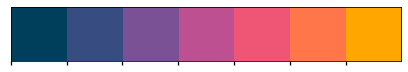

In [157]:
# Choosing standard colors for project
pal = ['#003f5c',
        '#374c80',
        '#7a5195',
        '#bc5090',
        '#ef5675',
        '#ff764a',
        '#ffa600']

color_codes = ['darkblue', 'indigo', 'purple', 'pink', 'peach', 'orange', 'yellow']

c = lambda x: pal[color_codes.index(x)]

sns.palplot(sns.color_palette(pal))

Ooo that's pretty.  Let's take a look now at our data -- coming from a csv.

## Load

In [158]:
# Here we go!  Read csv, look at initial shape

df = pd.read_csv('data/kc_house_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Because my stakeholder and business proposition is recommending enhancements for homeowners, I am going to remove the features that are not impactable by the hoemowner.  (i.e. Homeowner can't change the fact that they are or are not on waterfront)

In [159]:
# removing waterfront, view, lat, long, zipcode from dataframe

df_clean = df.drop(
    ['waterfront', 'view', 'lat', 'long', 'zipcode'], axis=1)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 2.6+ MB


In [160]:
# Digging into object/ string fields to understand how we will transform.  First
# suspect is sqft_basement, would assume numeric values and 0 for no basement.

df_clean['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1852.0        1
1880.0        1
1960.0        1
2810.0        1
1770.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [161]:
# Changing basement sqft column.  Adjusting ? to 0.0, and changing data type
# to numeric in order to feed model.

df_clean['sqft_basement'] = df_clean['sqft_basement'].replace(['?'],'0.0')

df_clean['sqft_basement'].astype(float)

df_clean['sqft_basement'].value_counts();

In [162]:
# Digging into yr_renovated

df_clean['yr_renovated'].value_counts();

In [163]:
# Not a ton of values, so going to add a boolean feature = is renovated

conditions = [df_clean.loc[:,'yr_renovated'] > 0,
              df_clean.loc[:,'yr_renovated'] == 0]

values = [1,0]

df_clean.loc[:,'is_renovated'] = np.select(conditions, values, default=0)

df_clean['is_renovated'].value_counts();

In [164]:
# Adding another column with the count of years between yr built and renovation 'yr_frm_btr'

conditions = [
    (df_clean['yr_renovated'] == 0),
    (df_clean['yr_renovated'] > 0)
    ]

# create a list of the values we want to assign for each condition
values = [0, (df_clean['yr_renovated'] - df_clean['yr_built'])]

# create a new column and use np.select to assign values to it using our lists as arguments
df['yr_frm_btr'] = np.select(conditions, values);

In [165]:
# Dropping the yr_renovated column.  Don't necessarily need it right now

df_clean = df_clean.drop('yr_renovated', axis = 1)

In [166]:
# Another look again at info

df_clean.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  sqft_living15  21597 non-null  int64  
 14  sqft_lot15     21597 non-null  int64  
 15  is_renovated   21597 non-null  int64  
dtypes: float64(3), int64(9), object(4)
memory usage: 2.6+ MB


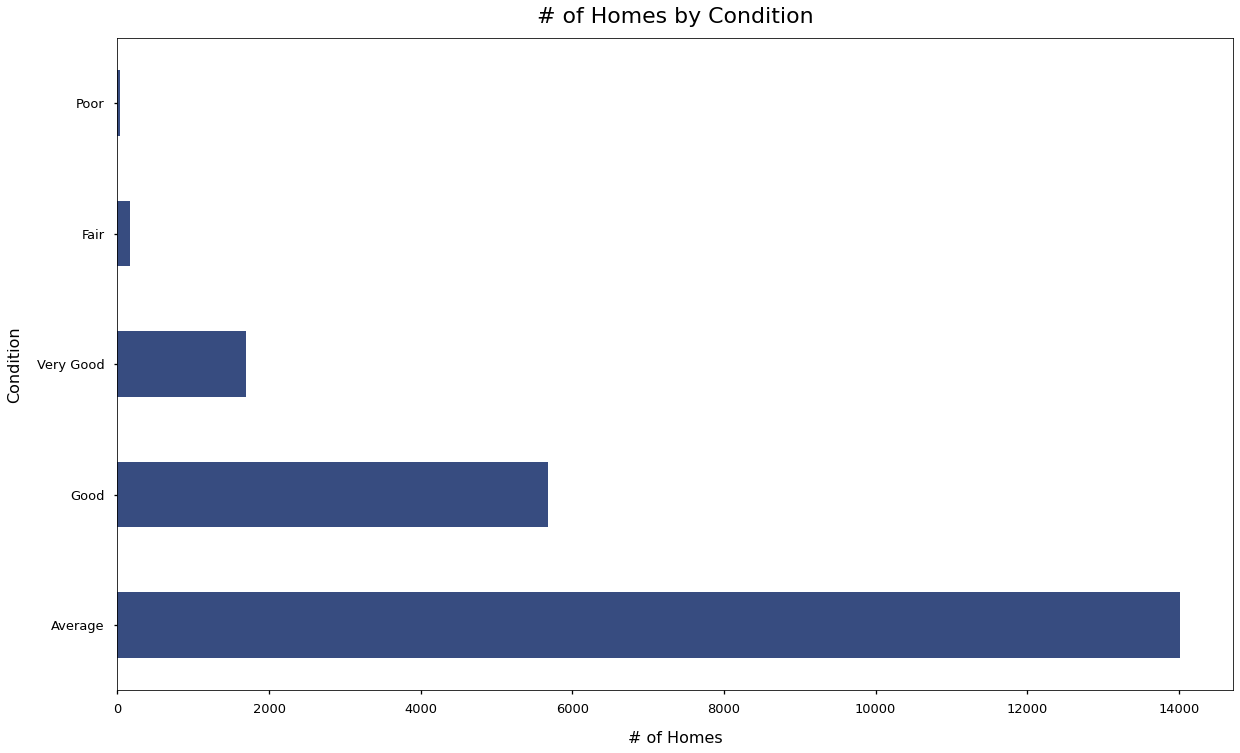

In [167]:
# checking out condition; will need to one hot encode these columns
fig, ax = plt.subplots(figsize = (20,12))

df_clean['condition'].value_counts().plot(kind='barh', color=c("indigo"))


ax.set_title('# of Homes by Condition', pad = 15, fontsize = 22)
ax.set_xlabel('# of Homes', labelpad = 15, fontsize = 16)
ax.set_ylabel('Condition', labelpad = 15, fontsize = 16) 

plt.show();

This breakdown is a little disappointing.  There really isn't a great distribution of condition.  Everything is listed as good, and above.  Going to look at grade to see if that
has a better distribution before encoding.

In [168]:
# checking out grade; going to strip string so we can make column numeric.

df_clean['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [169]:
# split column and add new columns to df
gd_sp = df_clean['grade'].str.split(' ', n = 1, expand = True)

# add column names
gd_sp.columns = ['grade_num', "grade_cat"]

# concat back to df_clean dataframe
df_clean = pd.concat([df_clean, gd_sp], axis = 1)

# update grade_num column to int datatype
df_clean['grade_num'] = df_clean['grade_num'].astype(int)

In [170]:
# dropping original column from dataframe
df_clean = df_clean.drop(['grade'], axis = 1)

# checking df_clean to see where we are at.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   condition      21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  sqft_living15  21597 non-null  int64  
 13  sqft_lot15     21597 non-null  int64  
 14  is_renovated   21597 non-null  int64  
 15  grade_num      21597 non-null  int64  
 16  grade_cat      21597 non-null  object 
dtypes: float64(3), int64(10), object(4)
memory usage: 

In [171]:
# Adding some addtional features for fun; ratio of sq_ft above and floors;
# bedrooms amd bathrooms

In [172]:
# Adding ratio of above ground square footage to square footage of living area.  
# Trying to understand if their is more living square footage below ground, 
# is that attractive to a home buyer.

df_clean.loc[:,'sqft_a/l'] = (
    df_clean['sqft_above'] / df_clean['sqft_living']
    )

df_clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,is_renovated,grade_num,grade_cat,sqft_a/l
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,1180,0.0,1955,1340,5650,0,7,Average,1.000000
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,2170,400.0,1951,1690,7639,1,7,Average,0.844358
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,770,0.0,1933,2720,8062,0,6,Low Average,1.000000
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,1050,910.0,1965,1360,5000,0,7,Average,0.535714
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,1680,0.0,1987,1800,7503,0,8,Good,1.000000


In [173]:
# Building ratio for living square footage to # of bedrooms.

df_clean.loc[:,'sqft_l/b'] = (
    round(df_clean['sqft_living'] / df_clean['bedrooms'],2)
    )

df_clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,is_renovated,grade_num,grade_cat,sqft_a/l,sqft_l/b
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,1180,0.0,1955,1340,5650,0,7,Average,1.000000,393.33
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,2170,400.0,1951,1690,7639,1,7,Average,0.844358,856.67
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,770,0.0,1933,2720,8062,0,6,Low Average,1.000000,385.00
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,1050,910.0,1965,1360,5000,0,7,Average,0.535714,490.00
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,1680,0.0,1987,1800,7503,0,8,Good,1.000000,560.00


In [174]:
# look for missing data/ na's

df_clean.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
sqft_living15    False
sqft_lot15       False
is_renovated     False
grade_num        False
grade_cat        False
sqft_a/l         False
sqft_l/b         False
dtype: bool

In [175]:
# Taking another peek to see what is left to clean or transform

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   condition      21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  sqft_living15  21597 non-null  int64  
 13  sqft_lot15     21597 non-null  int64  
 14  is_renovated   21597 non-null  int64  
 15  grade_num      21597 non-null  int64  
 16  grade_cat      21597 non-null  object 
 17  sqft_a/l       21597 non-null  float64
 18  sqft_l

In [176]:
# OHE categoricals final categoricals

categoricals = ['condition', 'grade_cat']

dummies = pd.get_dummies(df_clean[categoricals], prefix=categoricals, drop_first=True)

df_preprocessed = df_clean.drop(categoricals, axis=1)

df_clean = pd.concat([df_preprocessed, dummies], axis=1)

df_clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,grade_cat_Better,grade_cat_Excellent,grade_cat_Fair,grade_cat_Good,grade_cat_Low,grade_cat_Low Average,grade_cat_Luxury,grade_cat_Mansion,grade_cat_Poor,grade_cat_Very Good
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,1180,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,2170,400.0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,770,0.0,...,0,0,0,0,0,1,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,1050,910.0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,1680,0.0,...,0,0,0,1,0,0,0,0,0,0


In [177]:
# Cleaning final sqft_basement column, and dropping the date/ id column for now

df_clean = df_clean.drop('date', axis=1)
df_clean = df_clean.drop('id', axis=1)
df_clean['sqft_basement'] = df_clean['sqft_basement'].astype(float)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21597 non-null  float64
 1   bedrooms               21597 non-null  int64  
 2   bathrooms              21597 non-null  float64
 3   sqft_living            21597 non-null  int64  
 4   sqft_lot               21597 non-null  int64  
 5   floors                 21597 non-null  float64
 6   sqft_above             21597 non-null  int64  
 7   sqft_basement          21597 non-null  float64
 8   yr_built               21597 non-null  int64  
 9   sqft_living15          21597 non-null  int64  
 10  sqft_lot15             21597 non-null  int64  
 11  is_renovated           21597 non-null  int64  
 12  grade_num              21597 non-null  int64  
 13  sqft_a/l               21597 non-null  float64
 14  sqft_l/b               21597 non-null  float64
 15  co

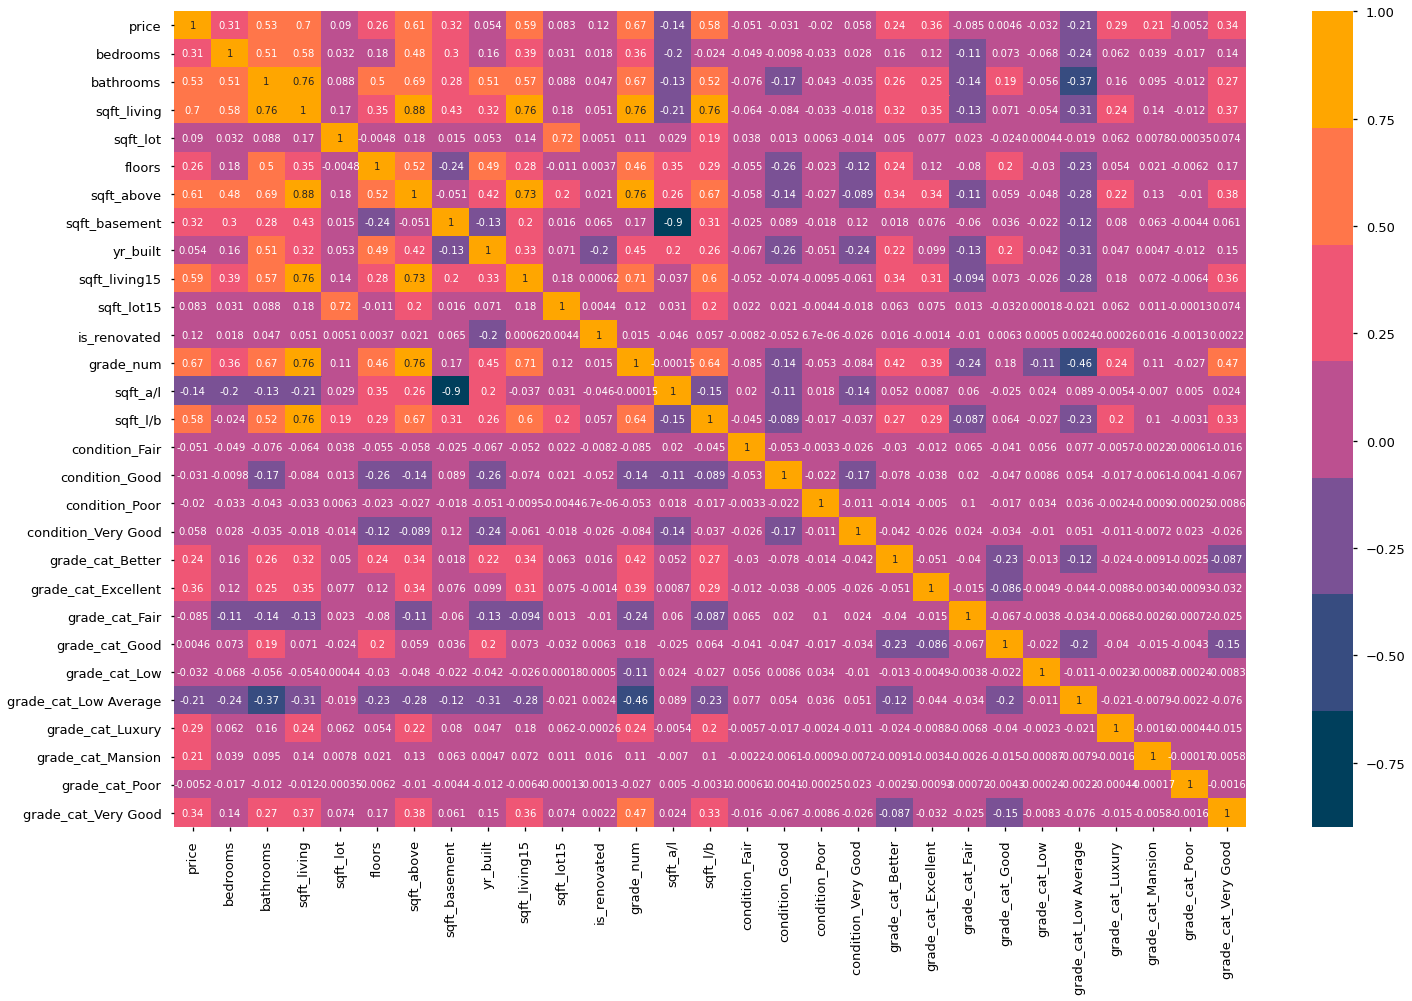

In [178]:
# Early correlation matrix to understand relationships with what we currently have.

plt.figure(figsize = (24,15))
corrM = df_clean.corr()

sns.heatmap(corrM, annot=True, cmap=pal)
plt.show()

Looks like bathrooms, sqft_living, sqft_above, sqft_lot15, and condition fair, all have decent (>.50) r2 with our dependent variable price.  We will see later if the the p-value of these independent variables are strong enough for us to continue to evaluate these variables as having the ability to predict price.  Unfortunately, we cannot do anything about the sqft_lot15 independent variable, so we will most likely be dropping this later.

## Initial EDA

I am going to first focus on 3 variables that have traditionally been included when determining the price of a house, the number of bedrooms, the number of bathrooms, and the square footage of the living area.  I am going to dig into these individually, and then look at the broader data before running any regressions.

In [179]:
# Look at initial distributions of columns

df_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,...,grade_cat_Better,grade_cat_Excellent,grade_cat_Fair,grade_cat_Good,grade_cat_Low,grade_cat_Low Average,grade_cat_Luxury,grade_cat_Mansion,grade_cat_Poor,grade_cat_Very Good
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,285.716581,1970.999676,1986.620318,...,0.121082,0.018475,0.011205,0.280826,0.001250,0.094365,0.004121,0.000602,0.000046,0.052507
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,439.819830,29.375234,685.230472,...,0.326230,0.134664,0.105263,0.449413,0.035337,0.292343,0.064064,0.024528,0.006805,0.223053
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,399.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,1490.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,1840.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,550.000000,1997.000000,2360.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,6210.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Average price is 540k, and median price is 450k, suggesting that there are some outliers driving the average higher than the median number.  This is also realized with bedrooms, sqft_living.  Which makes sense if we have some higher cost houses.  Conventional thought, I would expect those to be similarly distributed as the price because that is what I think typically drives the price of a house.

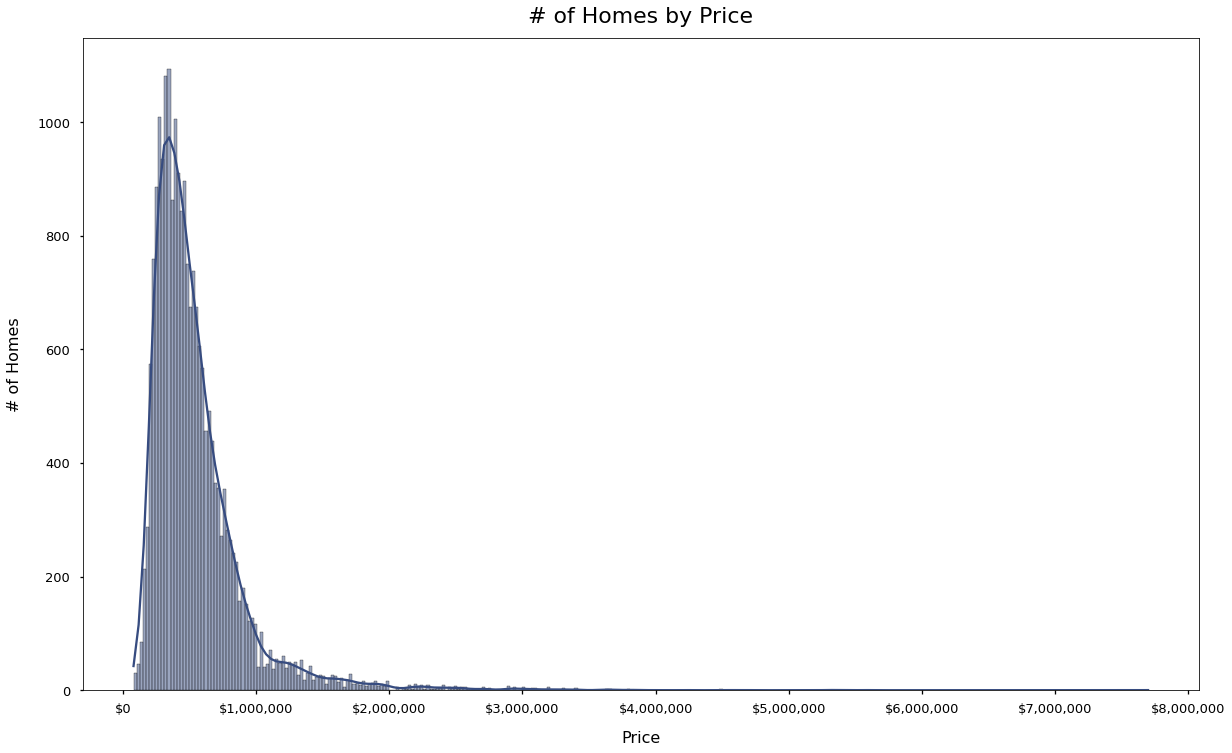

In [180]:
# Quick look at price, our dependent variable

fig, ax = plt.subplots(figsize=(20,12))

sns.histplot(data=df_clean, x='price', kde=True, color=c("indigo"))


ax.set_title('# of Homes by Price', pad=15, fontsize=22)
ax.set_xlabel('Price', labelpad=15, fontsize=16)
ax.set_ylabel('# of Homes', labelpad=15, fontsize=16) 

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

plt.show();

Distribution seems to be right skewed.  Meaning that our mean is above our Median and being inflated by outliers.  However not the end of the world at this point.  Going to continue to evaluate.

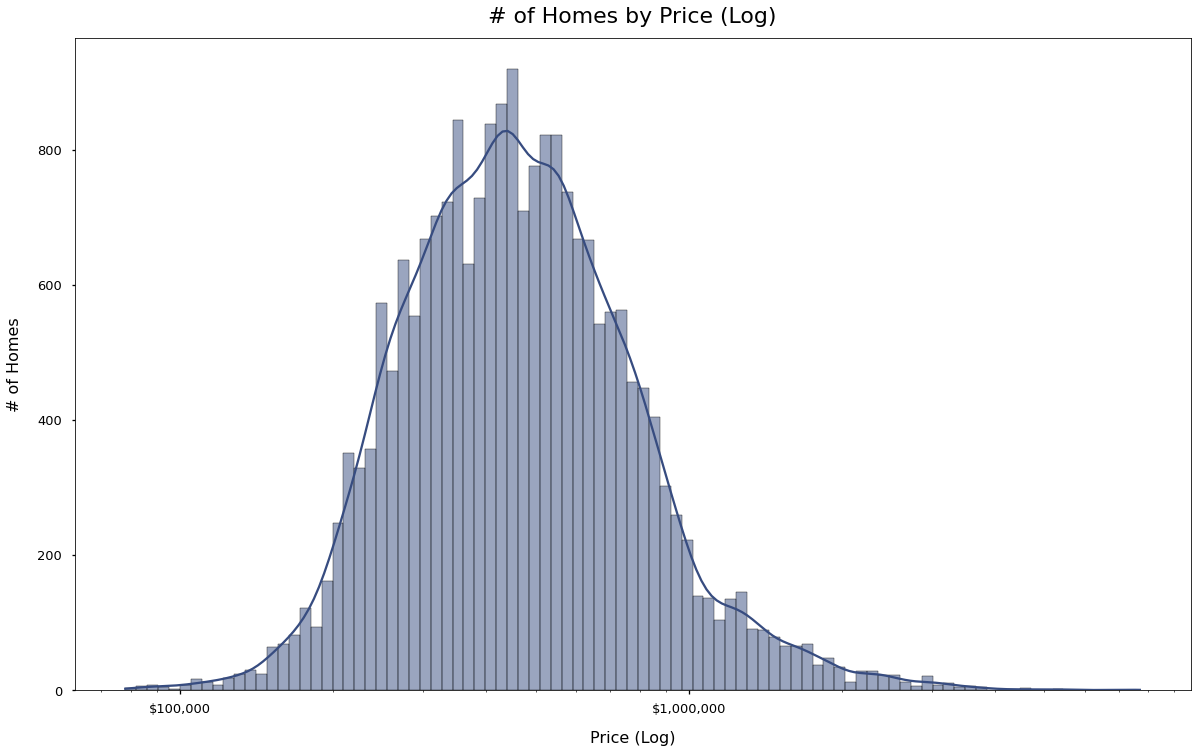

In [181]:
# Quick look at price, our dependent variable transformed as a log value

fig, ax = plt.subplots(figsize=(20,12))

sns.histplot(data=df_clean, x='price', kde=True, log_scale=True, color=c("indigo"))

ax.set_title('# of Homes by Price (Log)', pad=15, fontsize=22)
ax.set_xlabel('Price (Log)', labelpad=15, fontsize=16)
ax.set_ylabel('# of Homes', labelpad=15, fontsize=16) 

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

plt.show();



This looks much better.  I am going to keep my original values for the first values, but then will most likely change to a log scale in order to distribute the data normally.

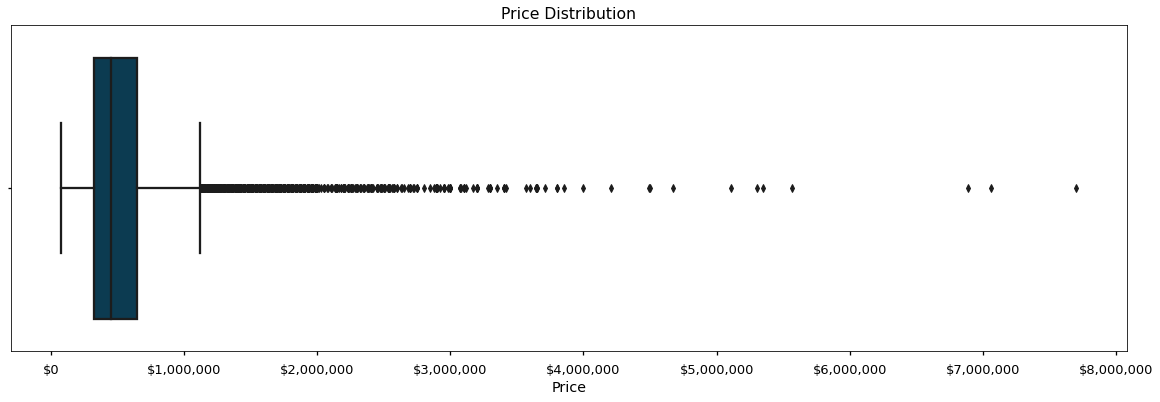

In [182]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Price Distribution')


bp = sns.boxplot(data=df_clean, 
            x='price',  
            palette=pal)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

bp.set_xlabel('Price');

Going to check to see how many records we would drop if we remove outliers outside of IQR.


In [183]:
# developing variables for IQR removal, and record count.
price_Q1 = df_clean['price'].quantile(0.25)
price_Q3 = df_clean['price'].quantile(0.75)

IQR = price_Q3 - price_Q1

lower_bnd = price_Q1 - 1.5 * IQR
upper_bnd = price_Q3 + 1.5 * IQR


In [184]:
# creating variable for lower bound
outliers_low = df_clean['price'] > lower_bnd

In [185]:
# creating variable for lower bound
outliers_up = df_clean['price'] < upper_bnd

In [186]:
print("% of Records Retained After Oulier Removal:", 
      "{:.1%}".format(len(df_clean['price'][~outliers_low | outliers_up])/ len(df_clean))
     )

% of Records Retained After Oulier Removal: 94.6%


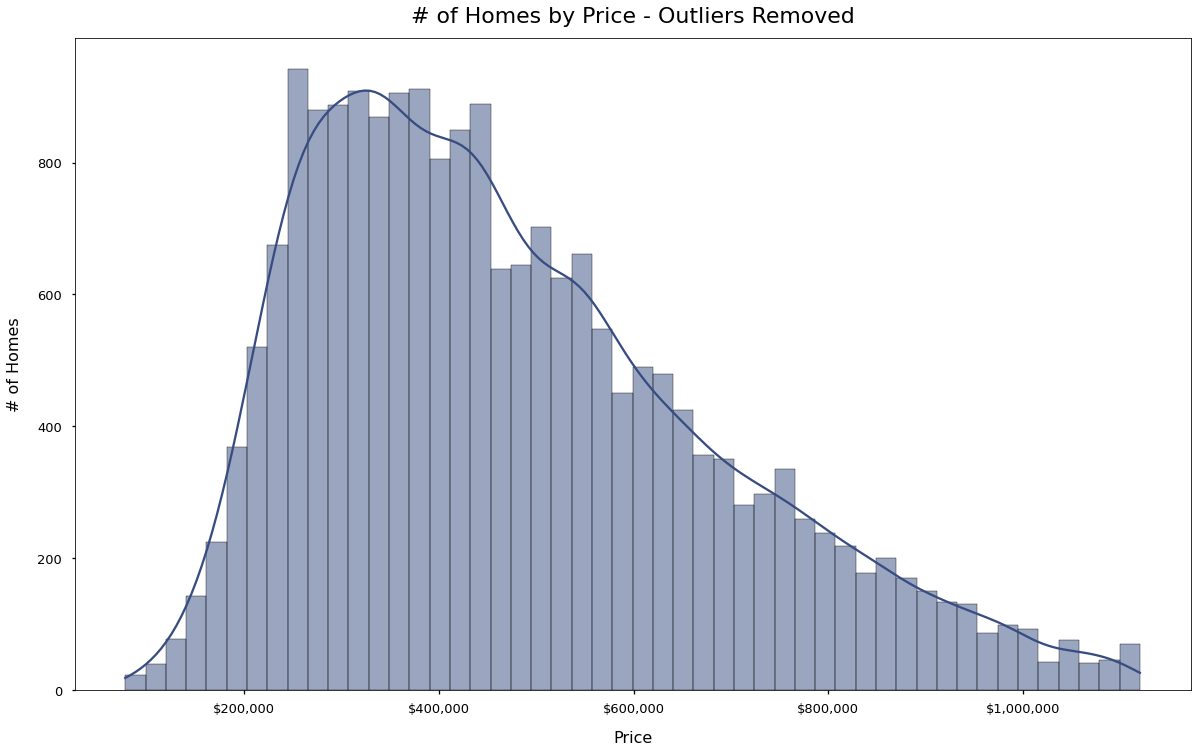

In [187]:
# taking a look at the new distribution less outliers

price_check = df_clean['price'][~outliers_low | outliers_up]

fig, ax = plt.subplots(figsize=(20,12))

sns.histplot(data=price_check, kde=True, color=c("indigo"))


ax.set_title('# of Homes by Price - Outliers Removed', pad=15, fontsize=22)
ax.set_xlabel('Price', labelpad=15, fontsize=16)
ax.set_ylabel('# of Homes', labelpad=15, fontsize=16) 

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

plt.show();

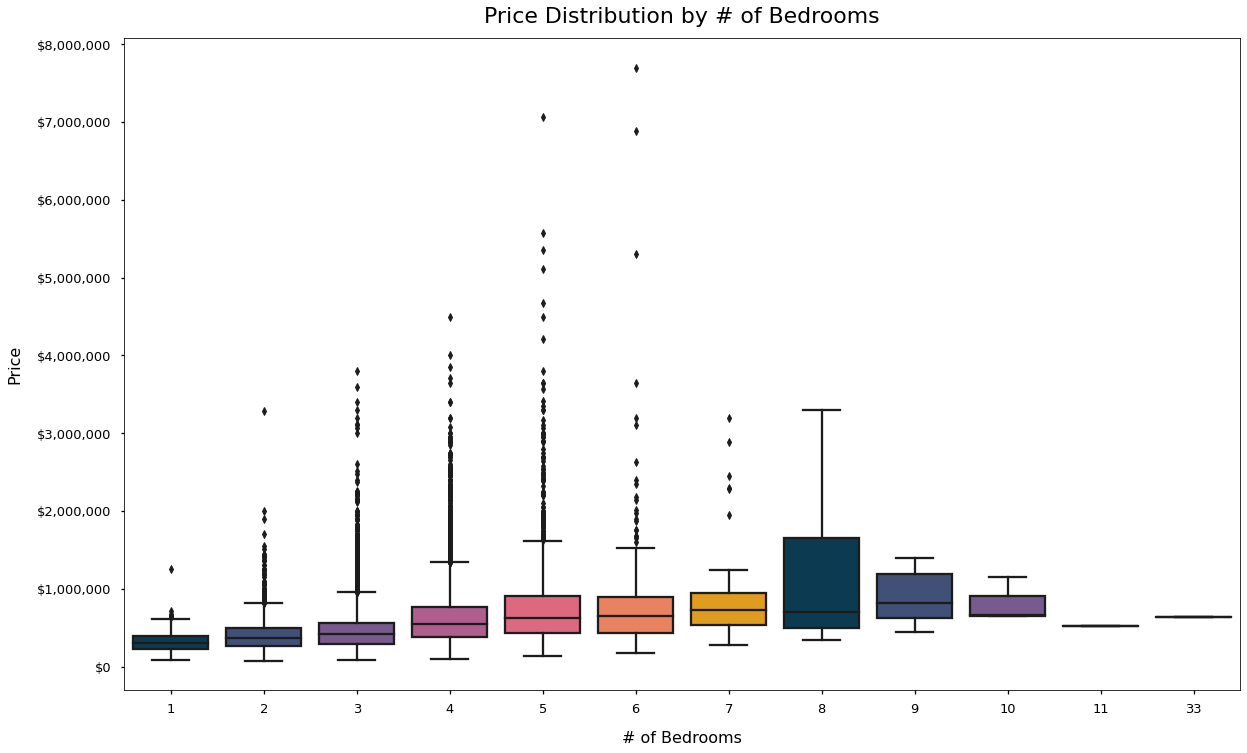

In [188]:
# boxplots for # of bedrooms and price

fig, ax = plt.subplots(figsize=(20,12))

ax.set_title('Price Distribution by # of Bedrooms')


bp = sns.boxplot(data=df_clean, 
            y='price', 
            x='bedrooms', 
            palette=pal)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.set_title('Price Distribution by # of Bedrooms', pad=15, fontsize=22)
ax.set_xlabel('# of Bedrooms', labelpad=15, fontsize=16)
ax.set_ylabel('Price', labelpad=15, fontsize=16) 

plt.show();

Removing outliers seems like it would be a good option.  Also probably easier than trying to interpret log transformed coefficients.  Will most likely try outlier removal first, then log transform.

''

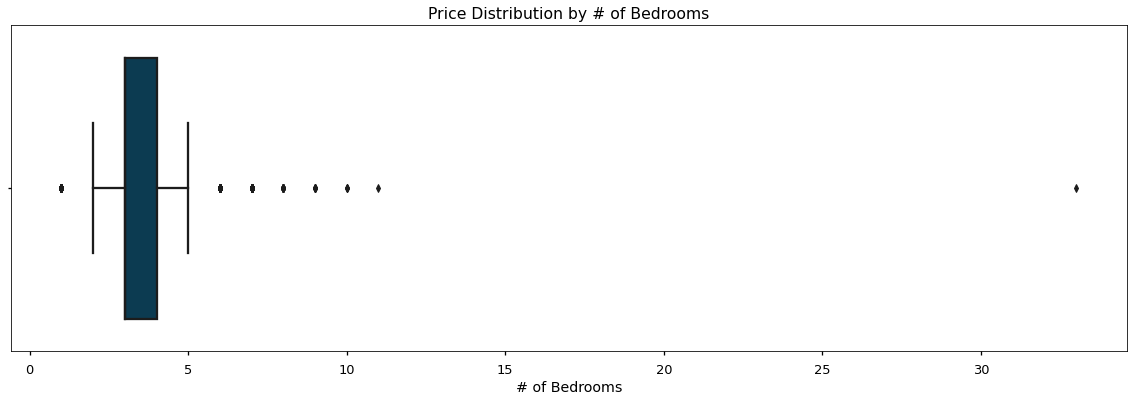

In [189]:
# taking a look at bedrooms only
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Price Distribution by # of Bedrooms')


bp = sns.boxplot(data=df_clean, 
            x='bedrooms', 
            palette=pal)

bp.set_ylabel('')
bp.set_xlabel('# of Bedrooms')
;

There doesn't seem to be a large difference between the median home price, as the number of bedrooms increase.  In fact, most of the outliers for price, are situated within the non-outlier values of bedrooms.  With that being said, there does seem to be a subtle increase in price, as the number of bedrooms increase.  The one record with the 33 bedrooms is a bit bothersome, however it doesn't look like the house really got the benefit of having that many bedrooms because the price was just above the average, and the sqft_living is below the median.  To me this looks like an error in the data in that it should be represented as 3 bedrooms, instead of 33 bedrooms.  The median, and the 25th percentiles are the same for bedrooms, with 3 bedrooms.

In [190]:
# isolating the bedroom row with 33 bedrooms for further inspection

df_clean.loc[df_clean['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,...,grade_cat_Better,grade_cat_Excellent,grade_cat_Fair,grade_cat_Good,grade_cat_Low,grade_cat_Low Average,grade_cat_Luxury,grade_cat_Mansion,grade_cat_Poor,grade_cat_Very Good
15856,640000.0,33,1.75,1620,6000,1.0,1040,580.0,1947,1330,...,0,0,0,0,0,0,0,0,0,0


In [191]:
# replacing 33 bedroom value with 3 bedrooms

df_clean['bedrooms'] = df['bedrooms'].replace([33],3)

''

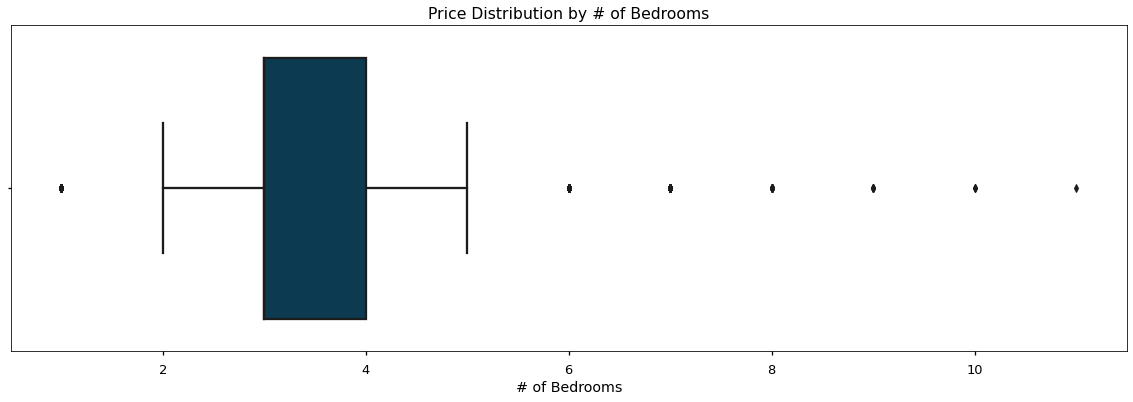

In [192]:
# quick view to make sure our operation worked.

fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Price Distribution by # of Bedrooms')


bp = sns.boxplot(data=df_clean, 
            x='bedrooms', 
            palette=pal)

bp.set_ylabel('')
bp.set_xlabel('# of Bedrooms')
;

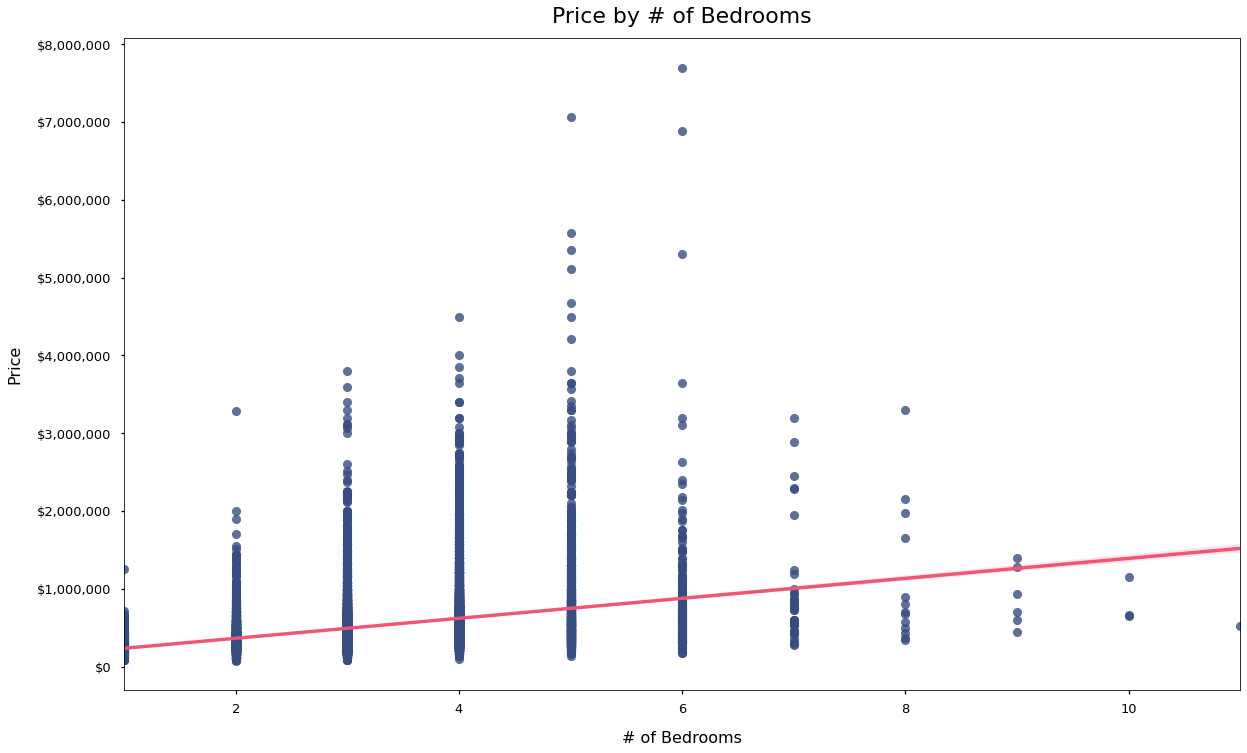

In [193]:
# scatter to look at the data between our bedroom variable and price.

fig, ax = plt.subplots(figsize = (20,12))

sns.regplot(x='bedrooms',
            y='price', 
            data=df_clean,
            scatter_kws={"color": c("indigo")}, 
            line_kws={"color": c("peach")})

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.set_title('Price by # of Bedrooms', pad=15, fontsize=22)
ax.set_xlabel('# of Bedrooms', labelpad=15, fontsize=16)
ax.set_ylabel('Price', labelpad=15, fontsize=16);

There seems to be a moderate positive relationship between the number of bedrooms and our price variable.  The data looks much more consistent without the 33 bedrooms.  I think the 33 bedrooms may have been inflating our expectations of the influence that bedrooms actually has on price.  There are a few outliers that remain, we will run a regression first and then determine if removing additional will be valuable.  Moving on to bathrooms next.

''

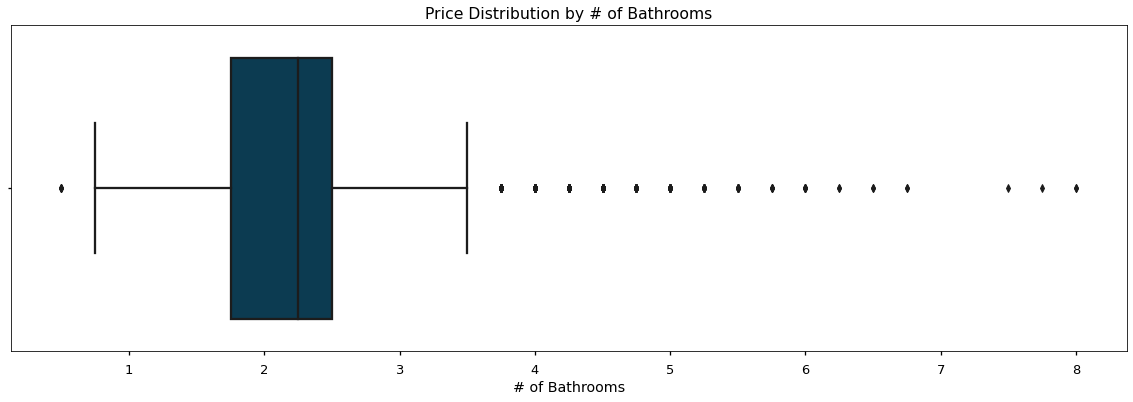

In [194]:
# quick view to make sure our operation worked.

fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Price Distribution by # of Bathrooms')


bp = sns.boxplot(data=df_clean, 
            x='bathrooms', 
            palette=pal)

bp.set_ylabel('')
bp.set_xlabel('# of Bathrooms')
;

A few outliers based on the boxplot, while most bathrooms are between .75 and 3.5.

''

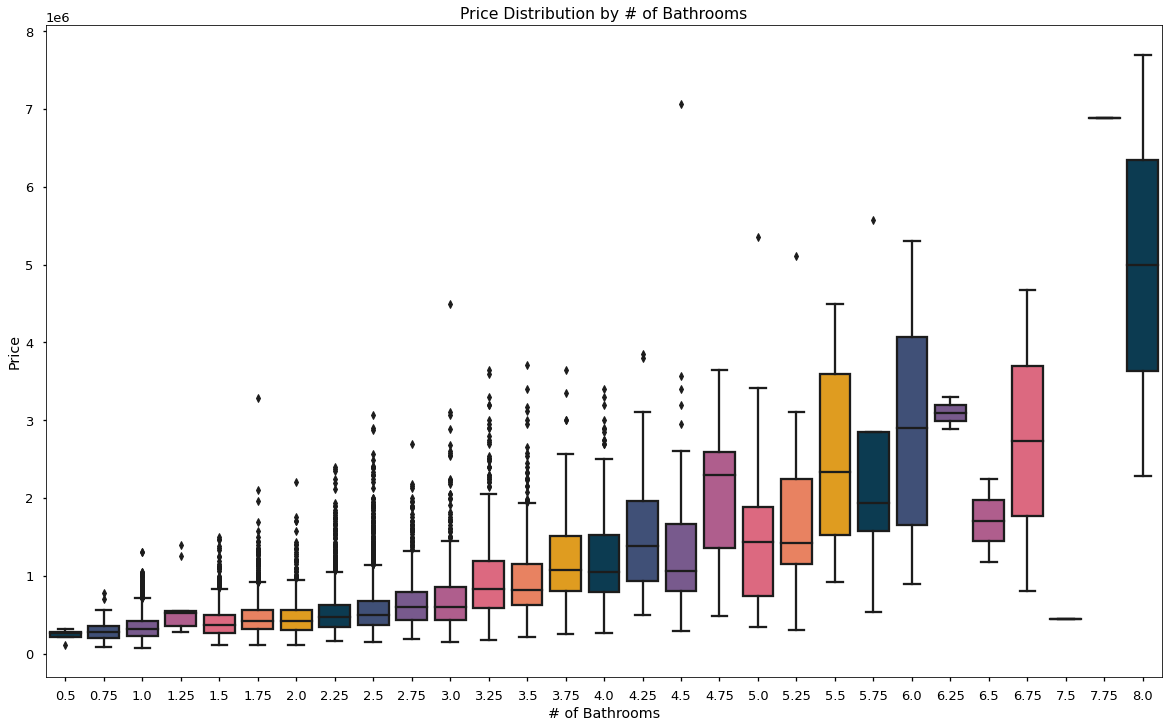

In [195]:
fig, ax = plt.subplots(figsize=(20,12))

ax.set_title('Price Distribution by # of Bathrooms')


bp = sns.boxplot(data=df_clean, 
            y='price', 
            x='bathrooms', 
            palette=pal)

bp.set_ylabel('Price')
bp.set_xlabel('# of Bathrooms')
;

Not crazy about all these .25, and .75 baths.  Especially since the lower end of values have a lot of overlap in price distribution.  Going to create another column that rounds up to the nearest half bath.  

In [196]:
# create a new column for rounded bathrooms.

df_clean['baths_rnd'] = (np.floor(df_clean['bathrooms'] * 2)/ 2)

In [197]:
df_clean[['baths_rnd', 'bathrooms']]

,baths_rnd,bathrooms
0,1.0,1.00
1,2.0,2.25
2,1.0,1.00
3,3.0,3.00
4,2.0,2.00
...,...,...
21592,2.5,2.50
21593,2.5,2.50
21594,0.5,0.75
21595,2.5,2.50


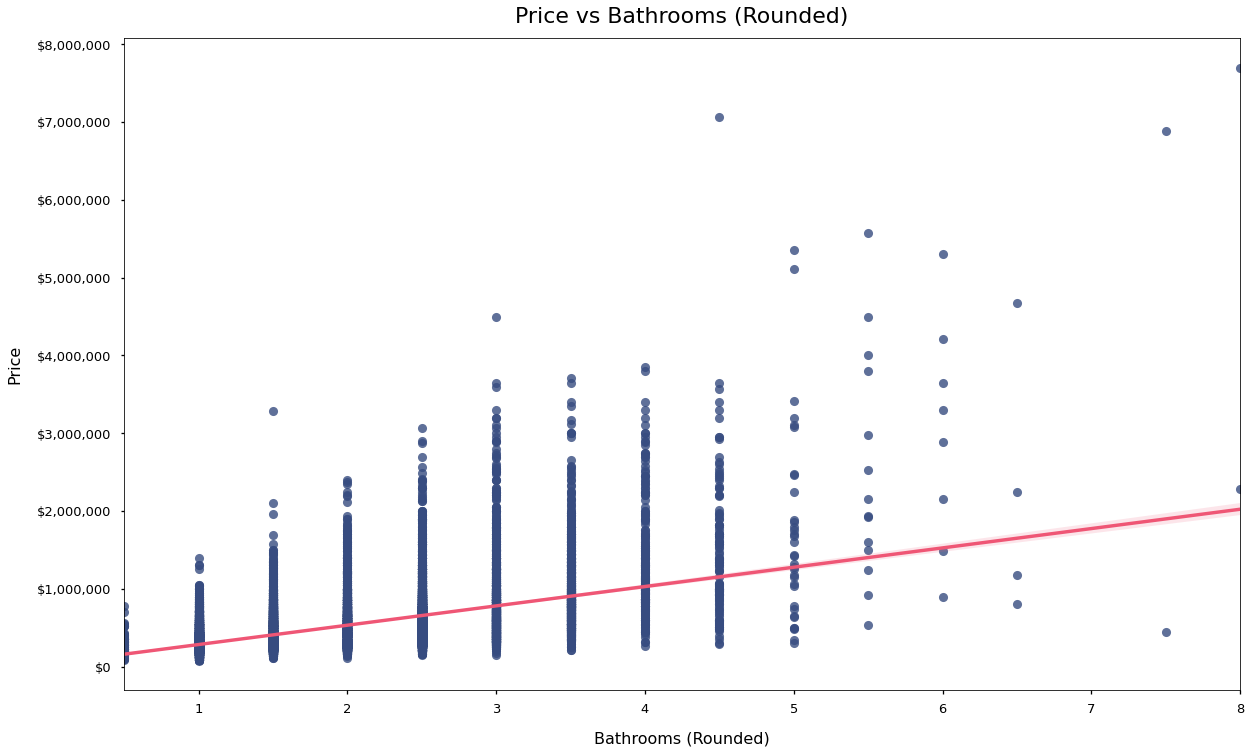

In [198]:
# scatter plot for my rounded bathrooms and the 

fig, ax = plt.subplots(figsize=(20,12))


sns.regplot(x='baths_rnd',
            y='price', 
            data=df_clean,
            scatter_kws={"color": c("indigo")}, 
            line_kws={"color": c("peach")})

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.set_title('Price vs Bathrooms (Rounded)', pad=15, fontsize=22)
ax.set_xlabel('Bathrooms (Rounded)', labelpad=15, fontsize=16)
ax.set_ylabel('Price', labelpad=15, fontsize=16);

Once again a slight correlation with price.  At a glance it looks like bathrooms have a stronger impact on price vs # the number of bedrooms listed on a house.  If this does turn out to be the case, then suggesting bathroom upgrades and potentially rounding up existing bathrooms would be easy enhancements to increase the value of a home for our customers.

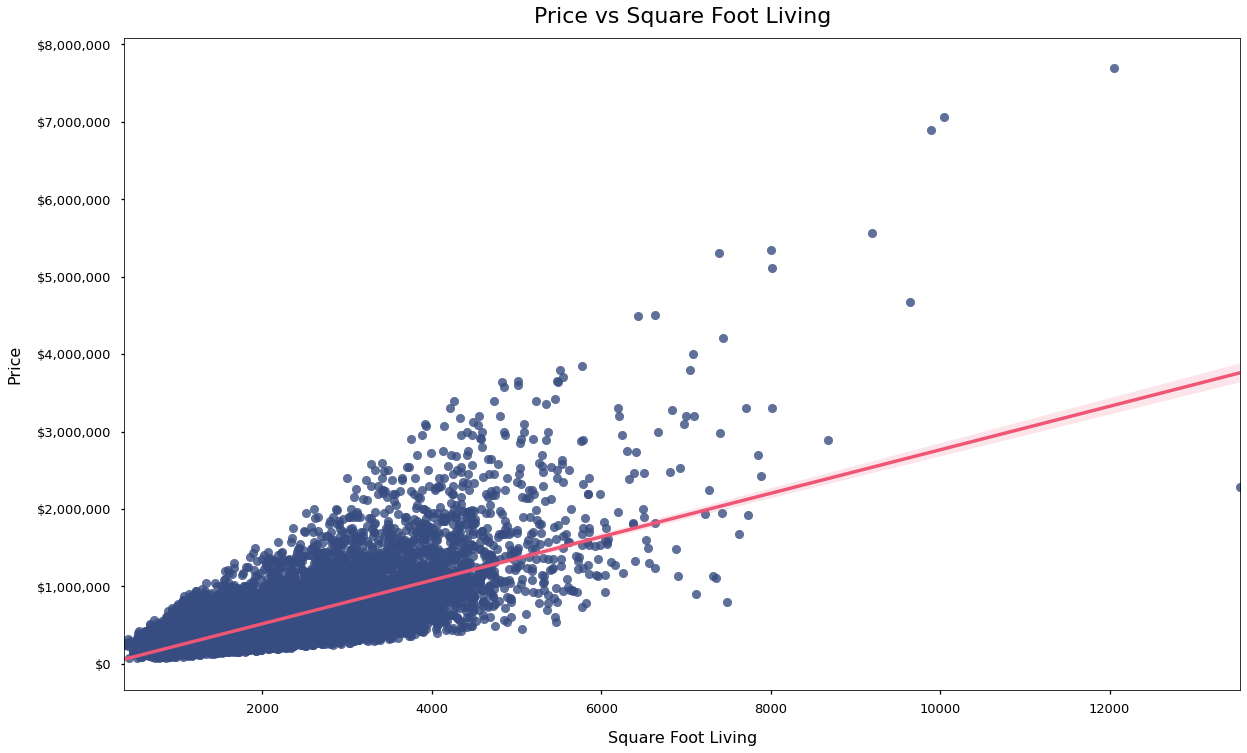

In [199]:
# lets take a quick look at price vs living area square footage.

fig, ax = plt.subplots(figsize=(20,12))

sns.regplot(x='sqft_living',
            y='price', 
            data=df_clean,
            scatter_kws={"color": c("indigo")}, 
            line_kws={"color": c("peach")})

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.set_title('Price vs Square Foot Living', pad=15, fontsize=22)
ax.set_xlabel('Square Foot Living', labelpad=15, fontsize=16)
ax.set_ylabel('Price', labelpad=15, fontsize=16);

So at a glance, it seems as if living area square footage will have the highest impact on the sale price of a home.  We will see if this holds true in our analysis/ regression.

## Regression Modeling

## Model 1

In [200]:
# creating our first regression on basic parameters as a baseline.

# create target 

target1 = df_clean['price']

# create predictors
predictors1 = df_clean.drop(['price'], axis=1)

# create model intercept
predictors_int1 = sm.add_constant(predictors1)

# fit model to data
model1 = sm.OLS(df_clean['price'],predictors_int1).fit()

In [201]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1481.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:03:40   Log-Likelihood:            -2.9581e+05
No. Observations:               21597   AIC:                         5.917e+05
Df Residuals:                   21568   BIC:                         5.919e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.633e+06   1.09e+05     33.248      0.000    3.42e+06    3.85e+06
bedrooms              -6.537e+04   4824.658    -13.550      0.000   -7.48e+04   -5.59e+04
bathrooms              1.287e+05   1.32e+04      9.752      0.000    1.03e+05    1.55e+05
sqft_living             292.8645     21.710     13.490      0.000     250.311     335.418
sqft_lot                  0.0145      0.051      0.283      0.777      -0.086       0.115
floors                 4.903e+04   3866.277     12.681      0.000    4.14e+04    5.66e+04
sqft_above             -140.9384     21.570     -6.534      0.000    -183.217     -98.660
sqft_basement            48.9285     19.138      2.557      0.011      11.416      86.441
yr_built              -3420.3193     71.347    -47.939      0.000   -3560.164   -3280.474
sqft_living15            44.8949      3.598     12.478      0.000      37.843      51.947
sqft_lot15               -0.5276      0.078     -6.757      0.000      -0.681      -0.375
is_renovated           6.822e+04   8491.465      8.034      0.000    5.16e+04    8.49e+04
grade_num              4.192e+05   8199.664     51.125      0.000    4.03e+05    4.35e+05
sqft_a/l               3.475e+05   2.58e+04     13.470      0.000    2.97e+05    3.98e+05
sqft_l/b               -171.3378     24.175     -7.087      0.000    -218.722    -123.954
condition_Fair        -3.098e+04   1.68e+04     -1.845      0.065   -6.39e+04    1935.242
condition_Good         1.924e+04   3687.608      5.217      0.000     1.2e+04    2.65e+04
condition_Poor        -2.969e+04   4.03e+04     -0.736      0.462   -1.09e+05    4.94e+04
condition_Very Good    6.002e+04   5928.825     10.124      0.000    4.84e+04    7.16e+04
grade_cat_Better      -6.107e+05   1.64e+04    -37.163      0.000   -6.43e+05   -5.79e+05
grade_cat_Excellent   -9.895e+05   3.39e+04    -29.192      0.000   -1.06e+06   -9.23e+05
grade_cat_Fair         6.975e+05   2.07e+04     33.710      0.000    6.57e+05    7.38e+05
grade_cat_Good        -3.344e+05   8552.379    -39.106      0.000   -3.51e+05   -3.18e+05
grade_cat_Low          1.086e+06   4.59e+04     23.680      0.000    9.96e+05    1.18e+06
grade_cat_Low Average  3.352e+05   9230.912     36.312      0.000    3.17e+05    3.53e+05
grade_cat_Luxury      -9.086e+05   4.52e+04    -20.114      0.000   -9.97e+05    -8.2e+05
grade_cat_Mansion     -2.743e+05   6.84e+04     -4.013      0.000   -4.08e+05    -1.4e+05
grade_cat_Poor         1.446e+06   1.97e+05      7.356      0.000    1.06e+06    1.83e+06
grade_cat_Very Good   -8.447e+05   2.49e+04    -33.978      0.000   -8.93e+05   -7.96e+05
baths_rnd             -7.711e+04    1.3e+04     -5.927      0.000   -1.03e+05   -5.16e+04
==============================================================================
Omnibus:                    13997.

Good first test.  Higher r2 than what I was anticipating.  I think we might have some co-linear features impacting our score and helping our model along.  I am concerned that our bathrooms feature has such a high p-value.  Another high p-value is sqft_lot; we can remove this feature as it will not really impact our recommendations to the customers.  Being able to add square footage to your lot isn't always the easiest.  With that being said, I am also going to remove both of the _15 metrics as those are also variables that will not help our customers.

In [202]:
# removing sqft_living15 and sqft_lot15

df_clean = df_clean.drop(['sqft_lot15', 'sqft_living15'], axis=1)

## Model 2

In [203]:
# create target
target2 = df_clean['price']

#create predictors
predictors2 = df_clean.drop(['price'], axis=1)

# create model intercept
predictors_int2 = sm.add_constant(predictors2)

# fit model to data
model2 = sm.OLS(df_clean['price'],predictors_int2).fit()

In [204]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     1574.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:03:41   Log-Likelihood:            -2.9590e+05
No. Observations:               21597   AIC:                         5.919e+05
Df Residuals:                   21570   BIC:                         5.921e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.631e+06    1.1e+05     33.126      0.000    3.42e+06    3.85e+06
bedrooms              -6.469e+04   4845.438    -13.350      0.000   -7.42e+04   -5.52e+04
bathrooms              1.293e+05   1.33e+04      9.754      0.000    1.03e+05    1.55e+05
sqft_living             293.4748     21.801     13.461      0.000     250.742     336.207
sqft_lot                 -0.2299      0.037     -6.269      0.000      -0.302      -0.158
floors                 4.294e+04   3830.499     11.209      0.000    3.54e+04    5.04e+04
sqft_above             -122.6786     21.617     -5.675      0.000    -165.050     -80.307
sqft_basement            54.4519     19.218      2.833      0.005      16.784      92.120
yr_built              -3402.0532     71.491    -47.587      0.000   -3542.181   -3261.926
is_renovated            6.47e+04   8524.710      7.590      0.000     4.8e+04    8.14e+04
grade_num              4.231e+05   8226.776     51.428      0.000    4.07e+05    4.39e+05
sqft_a/l               3.353e+05   2.59e+04     12.947      0.000    2.85e+05    3.86e+05
sqft_l/b               -169.5202     24.271     -6.984      0.000    -217.093    -121.947
condition_Fair         -3.06e+04   1.69e+04     -1.814      0.070   -6.37e+04    2460.254
condition_Good          1.92e+04   3702.570      5.186      0.000    1.19e+04    2.65e+04
condition_Poor        -1.207e+04   4.05e+04     -0.298      0.766   -9.14e+04    6.73e+04
condition_Very Good    5.839e+04   5953.535      9.808      0.000    4.67e+04    7.01e+04
grade_cat_Better      -5.966e+05   1.64e+04    -36.312      0.000   -6.29e+05   -5.64e+05
grade_cat_Excellent   -9.688e+05    3.4e+04    -28.533      0.000   -1.04e+06   -9.02e+05
grade_cat_Fair         7.025e+05   2.08e+04     33.818      0.000    6.62e+05    7.43e+05
grade_cat_Good        -3.277e+05   8560.161    -38.284      0.000   -3.44e+05   -3.11e+05
grade_cat_Low          1.105e+06   4.61e+04     23.992      0.000    1.01e+06     1.2e+06
grade_cat_Low Average  3.336e+05   9264.321     36.011      0.000    3.15e+05    3.52e+05
grade_cat_Luxury      -8.921e+05   4.53e+04    -19.693      0.000   -9.81e+05   -8.03e+05
grade_cat_Mansion     -2.889e+05   6.86e+04     -4.209      0.000   -4.23e+05   -1.54e+05
grade_cat_Poor         1.467e+06   1.97e+05      7.431      0.000    1.08e+06    1.85e+06
grade_cat_Very Good   -8.267e+05   2.49e+04    -33.224      0.000   -8.76e+05   -7.78e+05
baths_rnd             -7.837e+04   1.31e+04     -5.999      0.000   -1.04e+05   -5.28e+04
==============================================================================
Omnibus:                    13726.853   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           559123.091
Skew:                           2.478   Prob(JB):       

A little bit worse, but pretty consistent - .658 vs .655 r2. I am going to remove the outliers from my dependent variable price, to see if we can improve upon the r2 value.

In [205]:
# Removing outliers, and checking row count compared to what we had above =20439

df_clean_out = df_clean[df_clean['price'].between(lower_bnd, upper_bnd)]

len(df_clean_out)

20439

## Model 3

In [206]:
# quick check for colinearity

df_clean_out.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,is_renovated,...,grade_cat_Excellent,grade_cat_Fair,grade_cat_Good,grade_cat_Low,grade_cat_Low Average,grade_cat_Luxury,grade_cat_Mansion,grade_cat_Poor,grade_cat_Very Good,baths_rnd
price,1.000000,0.300832,0.454959,0.621362,0.093554,0.273360,0.529931,0.230675,0.061264,0.081213,...,0.179408,-0.120206,0.150452,-0.046332,-0.280575,0.037664,NaN,-0.007228,0.314374,0.443049
bedrooms,0.300832,1.000000,0.504697,0.601457,0.025619,0.160827,0.478118,0.281532,0.166782,0.002276,...,0.066369,-0.116506,0.104062,-0.071447,-0.242211,0.015402,NaN,-0.018430,0.105946,0.491785
bathrooms,0.454959,0.504697,1.000000,0.716700,0.064993,0.502707,0.638466,0.216803,0.544843,0.023136,...,0.132465,-0.144616,0.264295,-0.058611,-0.378834,0.040707,NaN,-0.012823,0.229428,0.986264
sqft_living,0.621362,0.601457,0.716700,1.000000,0.159058,0.340518,0.853404,0.369106,0.354009,0.019059,...,0.209765,-0.140313,0.161910,-0.060843,-0.337021,0.060906,NaN,-0.013155,0.351102,0.704719
sqft_lot,0.093554,0.025619,0.064993,0.159058,1.000000,-0.017066,0.162765,0.011572,0.042480,0.007383,...,0.045407,0.025812,-0.016508,0.000936,-0.016103,0.006248,NaN,-0.000281,0.091648,0.061620
floors,0.273360,0.160827,0.502707,0.340518,-0.017066,1.000000,0.528746,-0.291962,0.511811,-0.003562,...,0.075813,-0.079307,0.232445,-0.029721,-0.227587,0.009458,NaN,-0.006199,0.157082,0.521280
sqft_above,0.529931,0.478118,0.638466,0.853404,0.162765,0.528746,1.000000,-0.160702,0.462240,-0.002210,...,0.229989,-0.114976,0.134481,-0.051775,-0.292804,0.063524,NaN,-0.011433,0.371917,0.644027
sqft_basement,0.230675,0.281532,0.216803,0.369106,0.011572,-0.291962,-0.160702,1.000000,-0.149189,0.039616,...,-0.012066,-0.060036,0.065922,-0.022752,-0.115028,0.002565,NaN,-0.004503,0.002710,0.184412
yr_built,0.061264,0.166782,0.544843,0.354009,0.042480,0.511811,0.462240,-0.149189,1.000000,-0.197410,...,0.068225,-0.132708,0.225890,-0.043090,-0.323222,0.014160,NaN,-0.012188,0.159203,0.547011
is_renovated,0.081213,0.002276,0.023136,0.019059,0.007383,-0.003562,-0.002210,0.039616,-0.197410,1.000000,...,-0.011107,-0.008932,0.009555,0.001364,0.010161,-0.002778,NaN,-0.001242,-0.023076,0.023123


In [207]:
# Looking at absolute values above .75 for removal

abs(df_clean_out.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,is_renovated,...,grade_cat_Excellent,grade_cat_Fair,grade_cat_Good,grade_cat_Low,grade_cat_Low Average,grade_cat_Luxury,grade_cat_Mansion,grade_cat_Poor,grade_cat_Very Good,baths_rnd
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
sqft_living,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
is_renovated,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [208]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=df_clean_out.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [209]:
df[(df.cc >.75) & (df.cc <1)]

,cc
pairs,
"(bathrooms, baths_rnd)",0.986264
"(sqft_basement, sqft_a/l)",0.924708
"(sqft_above, sqft_living)",0.853404


In [211]:
final_df = df_clean_out.drop(['sqft_above',
                              'sqft_a/l',
                              'bathrooms'], axis=1)
final_df.shape

(20439, 25)

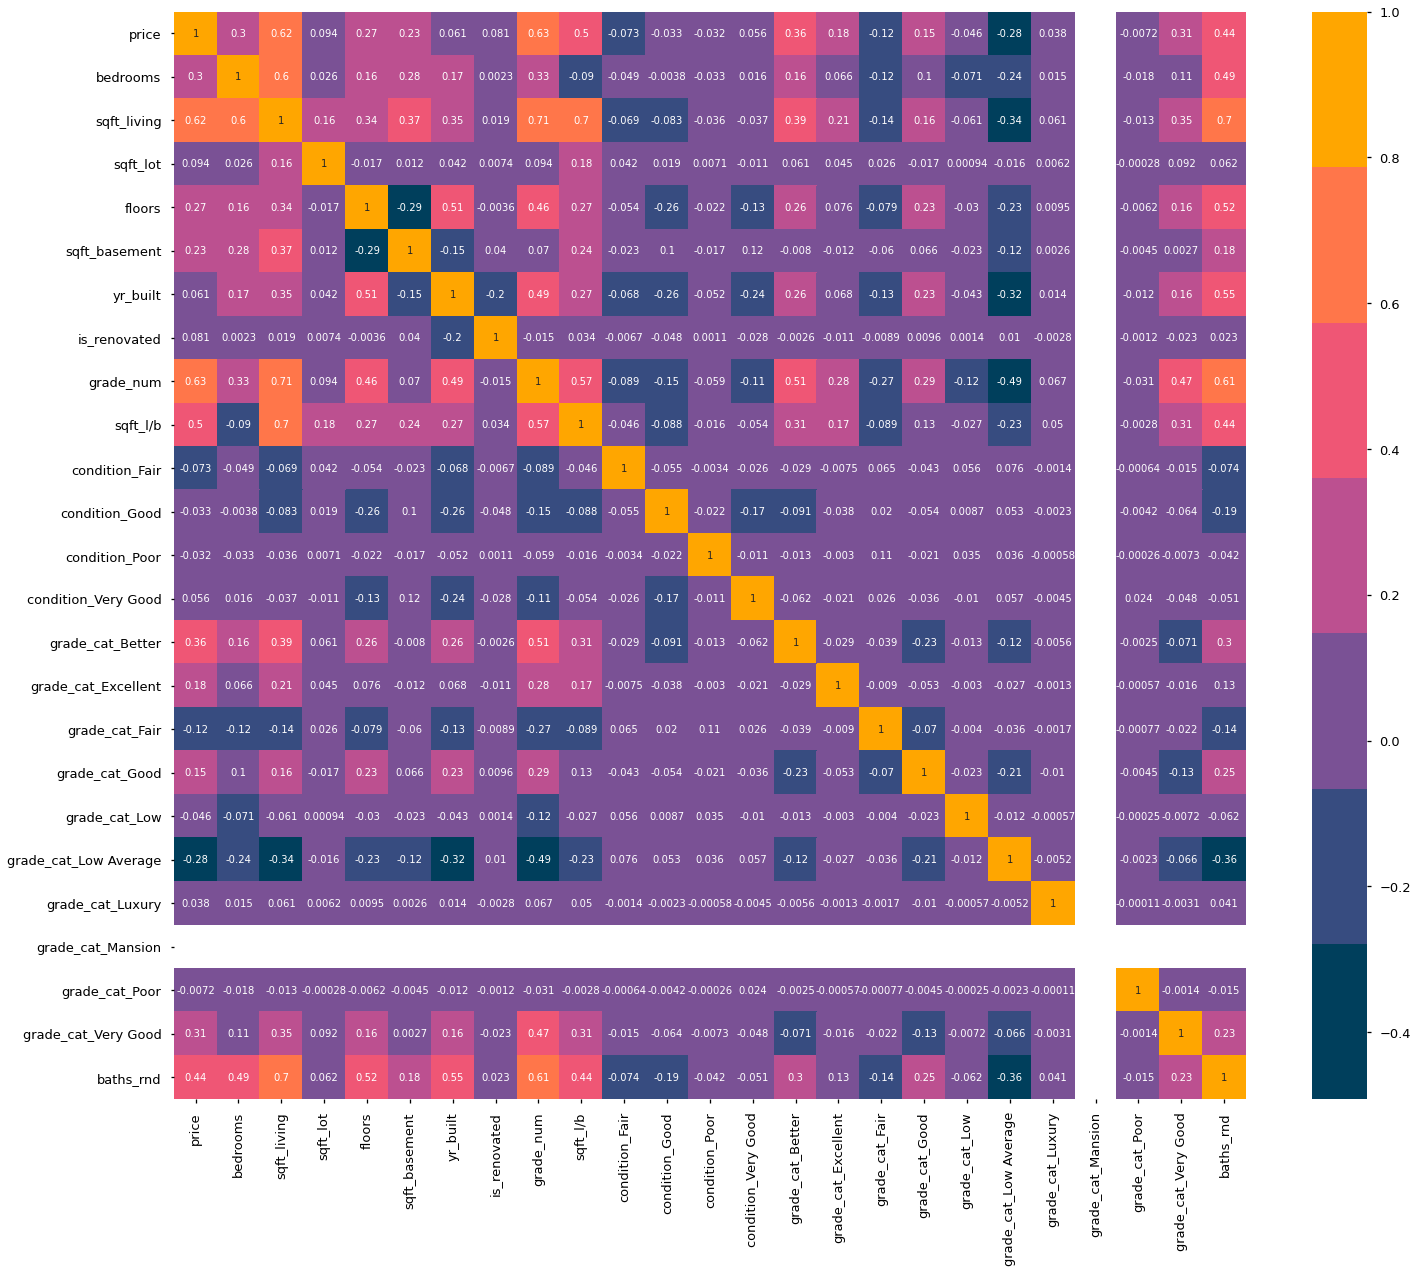

In [216]:
plt.figure(figsize = (24,20))
corrM = final_df.corr()

sns.heatmap(corrM, annot=True, cmap=pal)
plt.show()

In [1124]:
# model 3 includes same variables excluding price outliers
# create target
target3 = final_df['price']

# create predictors
predictors3 = final_df.drop(['price'], axis=1)

# create model intercept
predictors_int3 = sm.add_constant(predictors3)

# fit model to data
model3 = sm.OLS(final_df['price'],predictors_int3).fit()

In [1125]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1210.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:32:11   Log-Likelihood:            -2.7073e+05
No. Observations:               20439   AIC:                         5.415e+05
Df Residuals:                   20416   BIC:                         5.417e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.073e+06    6.8e+04     45.172      0.000    2.94e+06    3.21e+06
bedrooms              -1.066e+04   3334.150     -3.197      0.001   -1.72e+04   -4124.712
sqft_living              74.3342      5.633     13.197      0.000      63.294      85.375
sqft_lot                  0.0398      0.025      1.615      0.106      -0.009       0.088
floors                 4.336e+04   2513.808     17.248      0.000    3.84e+04    4.83e+04
sqft_basement            28.1269      3.082      9.127      0.000      22.086      34.167
yr_built              -2625.3160     47.651    -55.094      0.000   -2718.716   -2531.916
is_renovated           1.092e+04   5846.836      1.868      0.062    -540.210    2.24e+04
grade_num              3.235e+05   6864.866     47.129      0.000     3.1e+05    3.37e+05
sqft_l/b                 29.3502     16.903      1.736      0.083      -3.781      62.481
condition_Fair        -4.919e+04   1.08e+04     -4.569      0.000   -7.03e+04   -2.81e+04
condition_Good         1.107e+04   2393.435      4.623      0.000    6373.733    1.58e+04
condition_Poor        -4.487e+04   2.61e+04     -1.717      0.086   -9.61e+04    6366.425
condition_Very Good    4.282e+04   3913.305     10.942      0.000    3.51e+04    5.05e+04
grade_cat_Better      -4.122e+05   1.37e+04    -30.007      0.000   -4.39e+05   -3.85e+05
grade_cat_Excellent   -9.094e+05   2.94e+04    -30.979      0.000   -9.67e+05   -8.52e+05
grade_cat_Fair         4.986e+05   1.56e+04     31.925      0.000    4.68e+05    5.29e+05
grade_cat_Good        -2.169e+05   7007.362    -30.948      0.000   -2.31e+05   -2.03e+05
grade_cat_Low          8.217e+05   3.16e+04     25.981      0.000     7.6e+05    8.84e+05
grade_cat_Low Average  2.256e+05   7187.226     31.382      0.000    2.11e+05     2.4e+05
grade_cat_Luxury      -1.276e+06   5.98e+04    -21.347      0.000   -1.39e+06   -1.16e+06
grade_cat_Mansion      1.946e-10   1.64e-11     11.856      0.000    1.62e-10    2.27e-10
grade_cat_Poor         1.117e+06   1.23e+05      9.111      0.000    8.77e+05    1.36e+06
grade_cat_Very Good   -6.581e+05   2.09e+04    -31.488      0.000   -6.99e+05   -6.17e+05
baths_rnd              2.319e+04   2334.764      9.933      0.000    1.86e+04    2.78e+04
==============================================================================
Omnibus:                      864.623   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1235.469
Skew:                           0.412   Prob(JB):                    5.26e-269
Kurtosis:                       3.879   Cond. No.                     4.85e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [1126]:
# removing columns with > .05 p values and going to rerun model 3
final_df = final_df.drop(['sqft_l/b', 
                                  'sqft_basement',
                                  'sqft_lot',
                                  'is_renovated',
                                  'condition_Poor'], 
                                  axis=1)

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20439 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  20439 non-null  float64
 1   bedrooms               20439 non-null  int64  
 2   sqft_living            20439 non-null  int64  
 3   floors                 20439 non-null  float64
 4   yr_built               20439 non-null  int64  
 5   grade_num              20439 non-null  int64  
 6   condition_Fair         20439 non-null  uint8  
 7   condition_Good         20439 non-null  uint8  
 8   condition_Very Good    20439 non-null  uint8  
 9   grade_cat_Better       20439 non-null  uint8  
 10  grade_cat_Excellent    20439 non-null  uint8  
 11  grade_cat_Fair         20439 non-null  uint8  
 12  grade_cat_Good         20439 non-null  uint8  
 13  grade_cat_Low          20439 non-null  uint8  
 14  grade_cat_Low Average  20439 non-null  uint8  
 15  gr

## Model 3b

In [1127]:
# taking a look at our frame once again for final summary stats in presentation.
# Still not satisfied with r2, going to look at yr_built to see if there are any
# additional insights to remove potential outliers.

final_df.describe()

,price,bedrooms,sqft_living,floors,yr_built,grade_num,condition_Fair,condition_Good,condition_Very Good,grade_cat_Better,grade_cat_Excellent,grade_cat_Fair,grade_cat_Good,grade_cat_Low,grade_cat_Low Average,grade_cat_Luxury,grade_cat_Mansion,grade_cat_Poor,grade_cat_Very Good,baths_rnd
count,2.043900e+04,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.0,20439.000000,20439.000000,20439.000000
mean,4.767026e+05,3.329468,1975.189931,1.475561,1970.805079,7.530652,0.008220,0.264935,0.076325,0.113460,0.006703,0.011840,0.290768,0.001321,0.099662,0.000245,0.0,0.000049,0.037477,1.969886
std,2.077903e+05,0.884165,773.797924,0.536629,29.159010,1.036060,0.090291,0.441309,0.265523,0.317161,0.081598,0.108169,0.454128,0.036322,0.299557,0.015639,0.0,0.006995,0.189933,0.704445
min,7.800000e+04,1.000000,370.000000,1.000000,1900.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.500000
25%,3.150000e+05,3.000000,1400.000000,1.000000,1951.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.500000
50%,4.375000e+05,3.000000,1860.000000,1.000000,1974.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000
75%,6.000000e+05,4.000000,2430.000000,2.000000,1996.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.500000
max,1.120000e+06,11.000000,7480.000000,3.500000,2015.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,7.500000


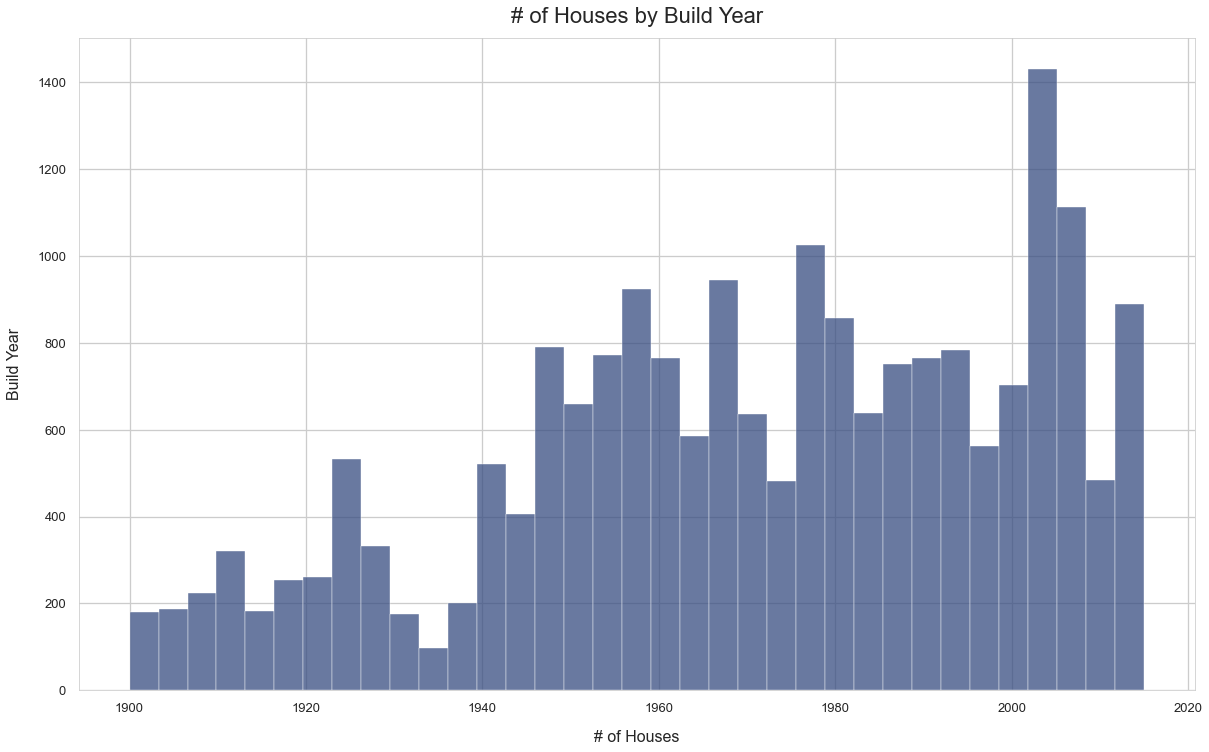

''

In [1128]:
fig, ax = plt.subplots(figsize = (20,12))

sns.histplot(data=final_df, x='yr_built', color = c("indigo"))

ax.set_title('# of Houses by Build Year', pad = 15, fontsize = 22)
ax.set_xlabel('# of Houses', labelpad = 15, fontsize = 16)
ax.set_ylabel('Build Year', labelpad = 15, fontsize = 16) 
plt.show();
;

In [1129]:
yr_built_chrt = pd.merge(yr_chrt, yr_chrt_std, how="inner", on=['yr_built', 'yr_built'])
yr_built_chrt

,yr_built,price_x,price_y
0,1990,427000.0,216310.123406
1,1991,472500.0,219239.747667
2,1992,454000.0,211952.279776
3,1993,414975.0,211979.722742
4,1994,429500.0,193073.005123
5,1995,490000.0,232990.176328
6,1996,509500.0,217945.446690
7,1997,492500.0,210806.489642
8,1998,471000.0,208110.161365
9,1999,472987.5,204343.227993


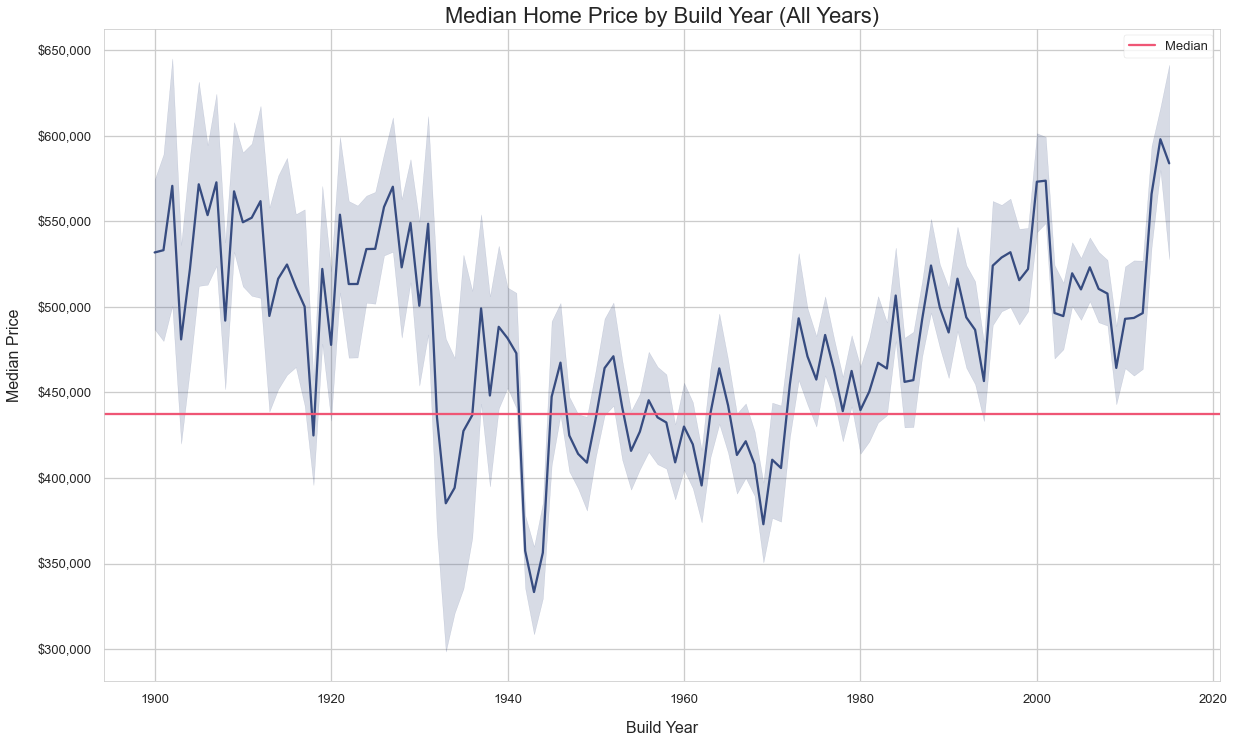

In [1130]:
# What is interesting is that median values are similar from years 1900 - 1935ish,
# and from

fig, ax = plt.subplots(figsize = (20,12))


sns.lineplot(x='yr_built',
            y='price',
            data=final_df,
            ax=ax,
            color=c('indigo'))

plt.axhline(final_df['price'].median(), color = c("peach"), label = 'Median')


fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.set_title('Median Home Price by Build Year (All Years)', fontsize = 22)
ax.set_xlabel('Build Year', labelpad = 15, fontsize = 16)
ax.set_ylabel('Median Price', labelpad = 15, fontsize = 16) 
plt.legend()

plt.show();

What is interesting is that median values are similar from years 1900 - 1935ish, and from 1990 to the end of our dataset in 2015.  Going to look at removing the values before 1990 to see if we can increase the relationship between price and yr_built, without sacrificing any sort of colinear relationship.  There is probably also something to be said around how houses were constructed in these different time periods.

In [1131]:
# Looks like price bounces around quite a bit when comparing records, and yr_built
# Going to adjust my dataframe to include more recent housing prices

final_df_recent = final_df.loc[final_df['yr_built'] >= 1990]

In [1132]:
final_df_recent.describe()

,price,bedrooms,sqft_living,floors,yr_built,grade_num,condition_Fair,condition_Good,condition_Very Good,grade_cat_Better,grade_cat_Excellent,grade_cat_Fair,grade_cat_Good,grade_cat_Low,grade_cat_Low Average,grade_cat_Luxury,grade_cat_Mansion,grade_cat_Poor,grade_cat_Very Good,baths_rnd
count,6.463000e+03,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.0,6463.000000,6463.000000,6463.0,6463.0,6463.000000,6463.000000
mean,5.187825e+05,3.449636,2321.461396,1.992109,2002.830419,8.183197,0.000464,0.038372,0.002785,0.233019,0.015782,0.000619,0.405849,0.0,0.005570,0.000774,0.0,0.0,0.083707,2.507968
std,2.054968e+05,0.798226,820.258728,0.432650,7.017290,0.985589,0.021542,0.192108,0.052704,0.422787,0.124641,0.024872,0.491094,0.0,0.074431,0.027806,0.0,0.0,0.276970,0.517092
min,1.540000e+05,1.000000,550.000000,1.000000,1990.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.500000
25%,3.500000e+05,3.000000,1670.000000,2.000000,1997.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.500000
50%,4.750000e+05,3.000000,2240.000000,2.000000,2004.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.500000
75%,6.525500e+05,4.000000,2860.000000,2.000000,2008.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.500000
max,1.120000e+06,9.000000,7350.000000,3.500000,2015.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,7.500000


In [1133]:
yr_chrt = (
    final_df_recent
    .groupby('yr_built')['price']
    .median()
    .reset_index()
    )

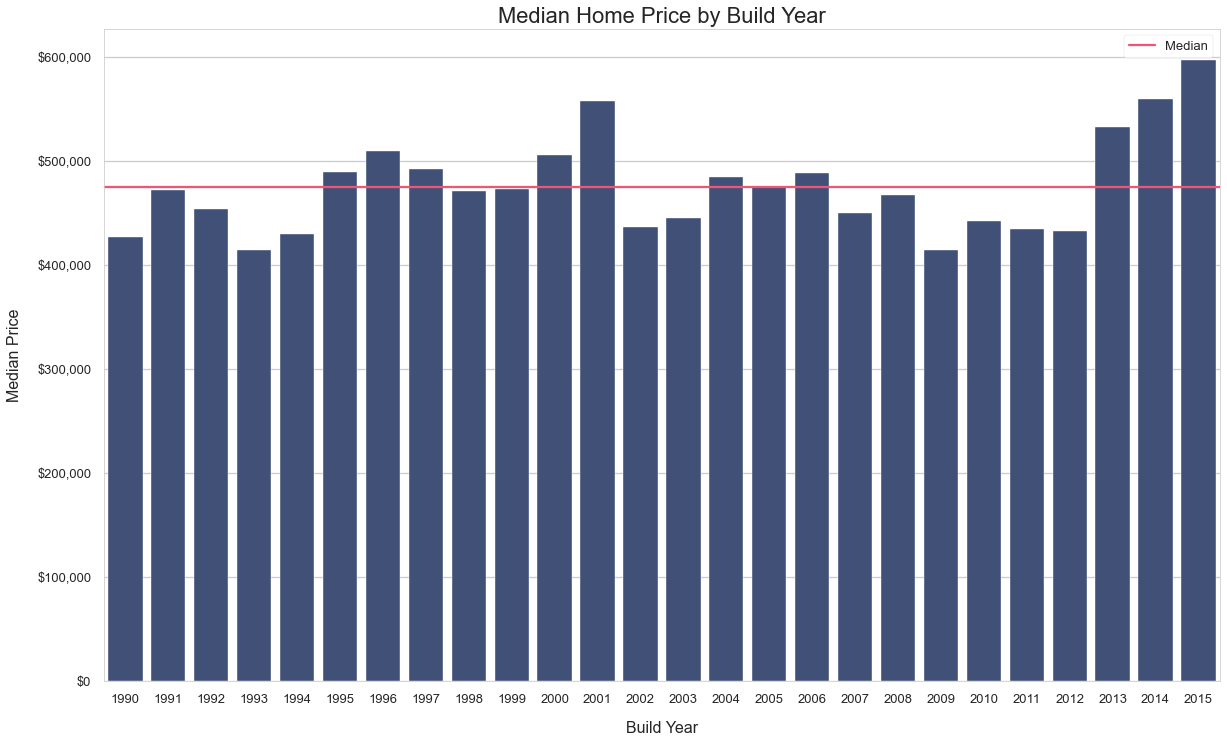

In [1134]:
# creating visual for presentaiton.  Showing median home values over time for 
# reference to show that they really don't fluctuate much above or below the median
# for the entire time frame.

fig, ax = plt.subplots(figsize = (20,12))


sns.barplot(x='yr_built',
            y='price',
            data=yr_chrt,
            color = c("indigo"),
            ax=ax)

plt.axhline(final_df_recent['price'].median(), color = c("peach"), label = 'Median')


fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.set_title('Median Home Price by Build Year', fontsize = 22)
ax.set_xlabel('Build Year', labelpad = 15, fontsize = 16)
ax.set_ylabel('Median Price', labelpad = 15, fontsize = 16) 
plt.legend()

plt.show();

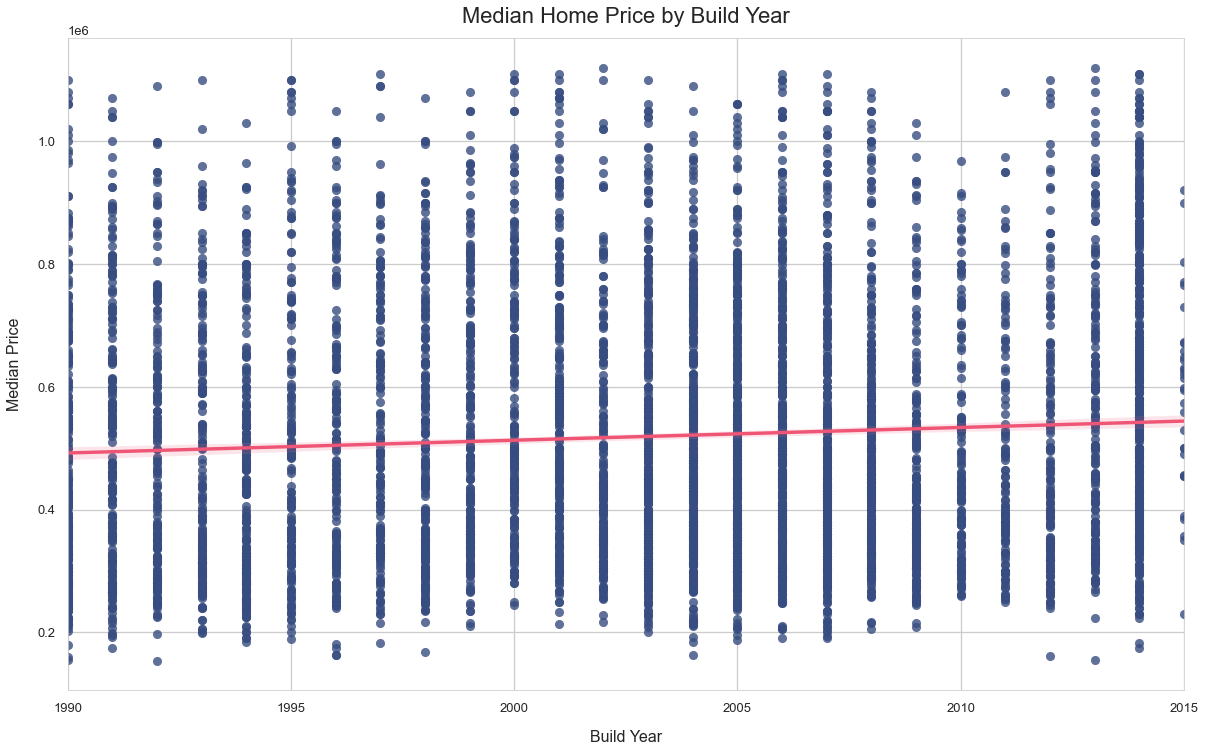

In [1135]:
fig, ax = plt.subplots(figsize = (20,12))

sns.regplot(x='yr_built',
            y='price', 
            data=final_df_recent,
            scatter_kws={"color": c("indigo")}, 
            line_kws={"color": c("peach")})

ax.set_title('Median Home Price by Build Year', pad = 15, fontsize = 22)
ax.set_xlabel('Build Year', labelpad = 15, fontsize = 16)
ax.set_ylabel('Median Price', labelpad = 15, fontsize = 16) 

plt.show();

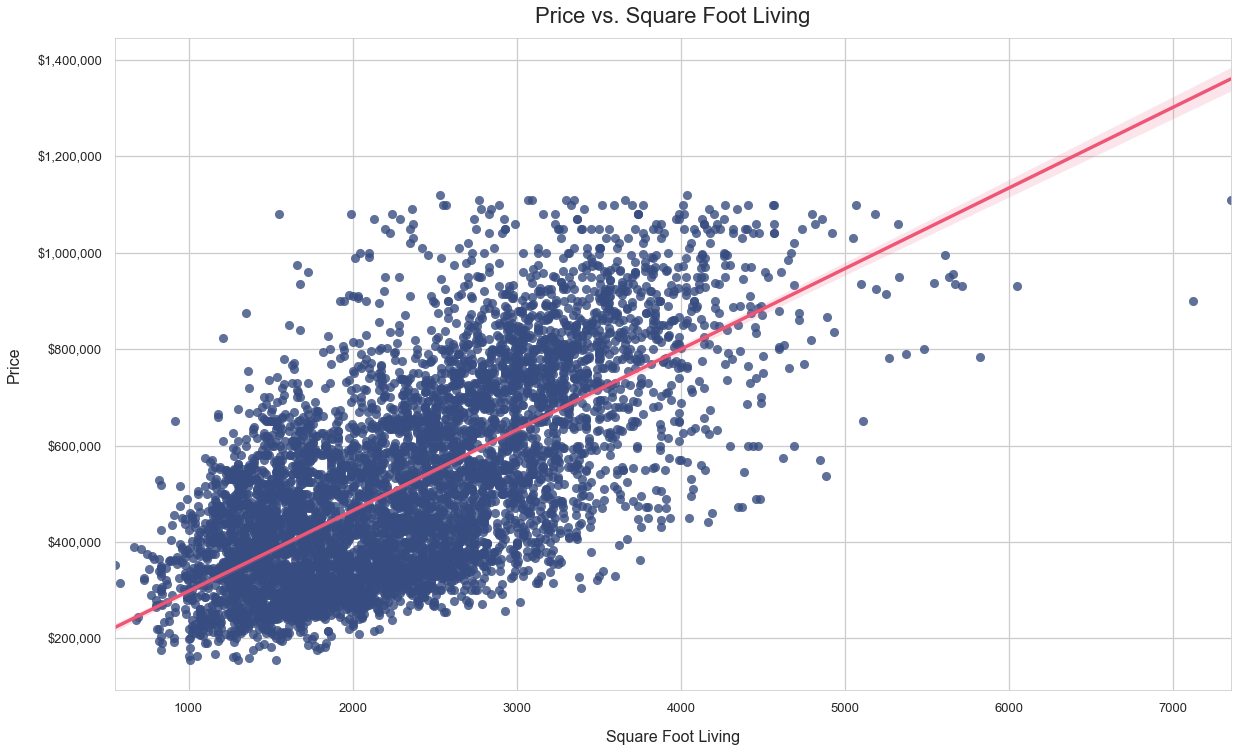

In [1136]:
fig, ax = plt.subplots(figsize = (20,12))

sns.regplot(x='sqft_living',
            y='price', 
            data=final_df_recent,
            scatter_kws={"color": c("indigo")}, 
            line_kws={"color": c("peach")})

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.set_title('Price vs. Square Foot Living', pad = 15, fontsize = 22)
ax.set_xlabel('Square Foot Living', labelpad = 15, fontsize = 16)
ax.set_ylabel('Price', labelpad = 15, fontsize = 16) 
plt.show();

In [1137]:
baths_chrt = (
    final_df_recent
    .groupby('baths_rnd')['price']
    .mean()
    .reset_index()
    )

In [1138]:
baths_chrt

,baths_rnd,price
0,0.5,367830.200000
1,1.0,356109.981481
2,1.5,383326.830287
3,2.0,413853.981839
4,2.5,513142.087209
5,3.0,599291.853782
6,3.5,722212.638604
7,4.0,798976.444444
8,4.5,868919.034483
9,5.0,615357.142857


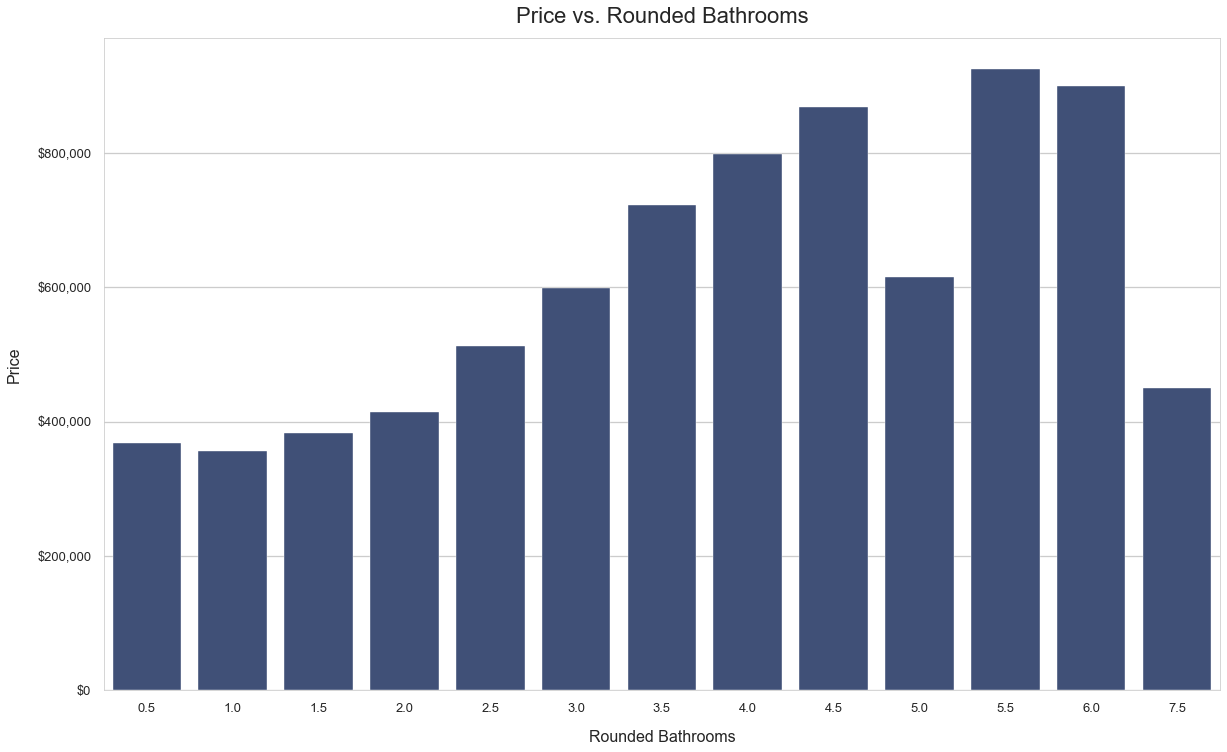

In [1139]:
fig, ax = plt.subplots(figsize = (20,12))

sns.barplot(x='baths_rnd',
            y='price', 
            data=baths_chrt,
            color=c('indigo')
           )

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.set_title('Price vs. Rounded Bathrooms', pad = 15, fontsize = 22)
ax.set_xlabel('Rounded Bathrooms', labelpad = 15, fontsize = 16)
ax.set_ylabel('Price', labelpad = 15, fontsize = 16) 
plt.show();

In [1144]:
# model 3b - removed outliers, combined with features with p values > .05

# create target
target3b = final_df_recent['price']

# create predictors
predictors3b = final_df_recent.drop(['price'], axis=1)

# create model intercept
predictors_int3b = sm.add_constant(predictors3b)

# fit model to data
model3b = sm.OLS(final_df_recent['price'],predictors_int3b).fit()

In [1145]:
model3b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     706.9
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:32:36   Log-Likelihood:                -85090.
No. Observations:                6463   AIC:                         1.702e+05
Df Residuals:                    6447   BIC:                         1.703e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.477e+06    2.7e+05     -9.166      0.000   -3.01e+06   -1.95e+06
bedrooms              -3.159e+04   2713.618    -11.642      0.000   -3.69e+04   -2.63e+04
sqft_living              99.0165      3.546     27.924      0.000      92.065     105.968
floors                 2.971e+04   3882.573      7.652      0.000    2.21e+04    3.73e+04
yr_built               2072.5795    243.101      8.526      0.000    1596.021    2549.138
grade_num             -2.149e+05   3.09e+04     -6.946      0.000   -2.76e+05   -1.54e+05
condition_Fair        -5.486e+04   7.31e+04     -0.750      0.453   -1.98e+05    8.85e+04
condition_Good         2.728e+04   8511.350      3.205      0.001    1.06e+04     4.4e+04
condition_Very Good    7.453e+04      3e+04      2.487      0.013    1.58e+04    1.33e+05
grade_cat_Better        6.43e+05   6.16e+04     10.436      0.000    5.22e+05    7.64e+05
grade_cat_Excellent    1.242e+06   1.25e+05      9.933      0.000    9.97e+05    1.49e+06
grade_cat_Fair        -2.743e+05   8.71e+04     -3.149      0.002   -4.45e+05   -1.04e+05
grade_cat_Good         2.971e+05   3.08e+04      9.647      0.000    2.37e+05    3.57e+05
grade_cat_Low          1.539e-10   1.47e-11     10.489      0.000    1.25e-10    1.83e-10
grade_cat_Low Average -2.403e+05   3.74e+04     -6.420      0.000   -3.14e+05   -1.67e+05
grade_cat_Luxury       1.392e+06   1.61e+05      8.642      0.000    1.08e+06    1.71e+06
grade_cat_Mansion              0          0        nan        nan           0           0
grade_cat_Poor                 0          0        nan        nan           0           0
grade_cat_Very Good    9.418e+05   9.33e+04     10.096      0.000    7.59e+05    1.12e+06
baths_rnd              2.142e+04   3984.425      5.376      0.000    1.36e+04    2.92e+04
==============================================================================
Omnibus:                      133.985   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.987
Skew:                           0.251   Prob(JB):                     1.84e-40
Kurtosis:                       3.653   Cond. No.                     2.07e+39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-68. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1146]:
# Insights
#Per square foot of above ground sq ft increases price by $20

#Per square foot of above ground living space increases price by $66

#As you increase the condition of the house from fair to good increases the price from -47780 to 9979.77.  

#And from good to very good to 40550.

#When you round your bathroom up to the nearest whole bathroom, you increase the value of your home by 27,120.

In [1148]:
final_df_recent = final_df_recent.drop(['condition_Fair',
                                        'grade_cat_Fair',
                                        'grade_cat_Mansion',
                                        'grade_cat_Poor',
                                        'grade_cat_Low',
                                        'grade_num'], axis=1)

In [1149]:
# model 3b - removed outliers, combined with features with p values > .05

# create target
target3b = final_df_recent['price']

# create predictors
predictors3b = final_df_recent.drop(['price'], axis=1)

# create model intercept
predictors_int3b = sm.add_constant(predictors3b)

# fit model to data
model3b = sm.OLS(target3b,predictors_int3b).fit()

In [1150]:
model3b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     814.5
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:32:47   Log-Likelihood:                -85094.
No. Observations:                6463   AIC:                         1.702e+05
Df Residuals:                    6449   BIC:                         1.703e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.993e+06   4.85e+05     -8.234      0.000   -4.94e+06   -3.04e+06
bedrooms              -3.172e+04   2714.122    -11.686      0.000    -3.7e+04   -2.64e+04
sqft_living              99.0443      3.547     27.925      0.000      92.091     105.997
floors                 2.933e+04   3880.330      7.559      0.000    2.17e+04    3.69e+04
yr_built               2079.6331    243.106      8.554      0.000    1603.065    2556.201
condition_Good         2.714e+04   8513.145      3.188      0.001    1.05e+04    4.38e+04
condition_Very Good    7.456e+04      3e+04      2.487      0.013    1.58e+04    1.33e+05
grade_cat_Better       2.132e+05   5429.392     39.273      0.000    2.03e+05    2.24e+05
grade_cat_Excellent     3.83e+05   1.43e+04     26.712      0.000    3.55e+05    4.11e+05
grade_cat_Good         8.211e+04   4156.616     19.753      0.000     7.4e+04    9.03e+04
grade_cat_Low Average  -2.61e+04   2.14e+04     -1.217      0.224   -6.81e+04    1.59e+04
grade_cat_Luxury       3.181e+05   5.75e+04      5.534      0.000    2.05e+05    4.31e+05
grade_cat_Very Good    2.973e+05   7776.543     38.226      0.000    2.82e+05    3.13e+05
baths_rnd               2.09e+04   3980.625      5.251      0.000    1.31e+04    2.87e+04
==============================================================================
Omnibus:                      135.340   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.946
Skew:                           0.255   Prob(JB):                     1.14e-40
Kurtosis:                       3.651   Cond. No.                     9.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

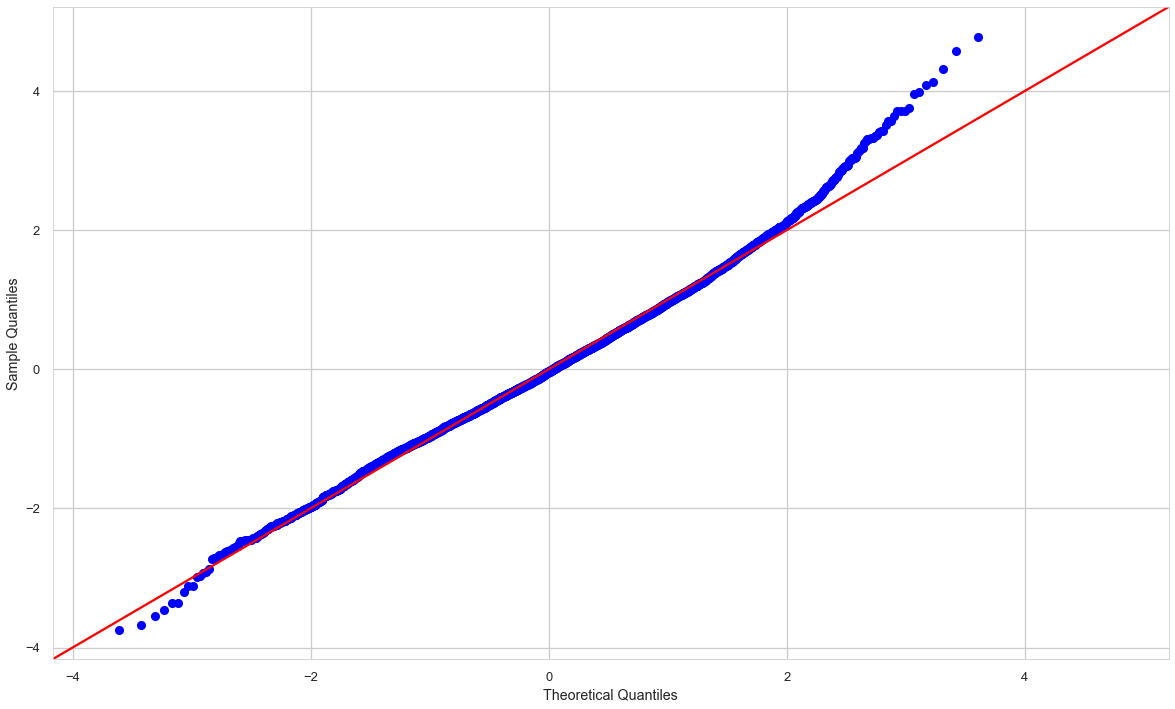

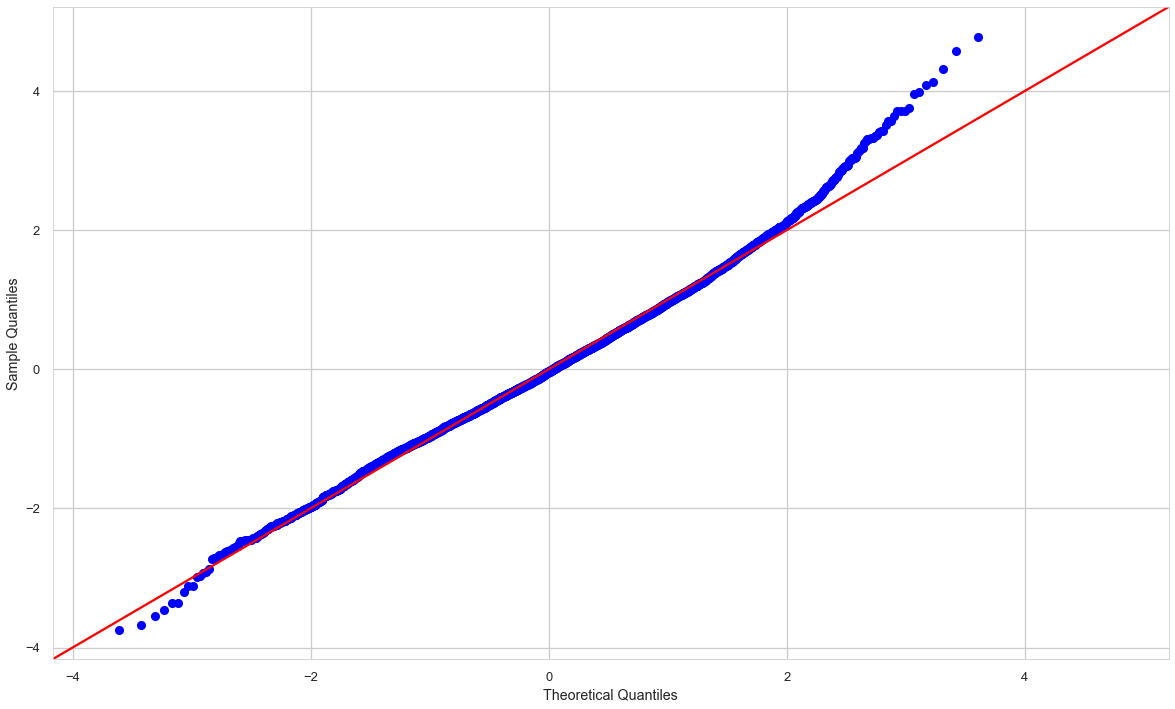

In [1196]:
fig, ax = plt.subplots(figsize = (20,12))

res = model3b.resid # residuals

sm.qqplot(res, fit=True, line='45', ax=ax)

<AxesSubplot:ylabel='Count'>

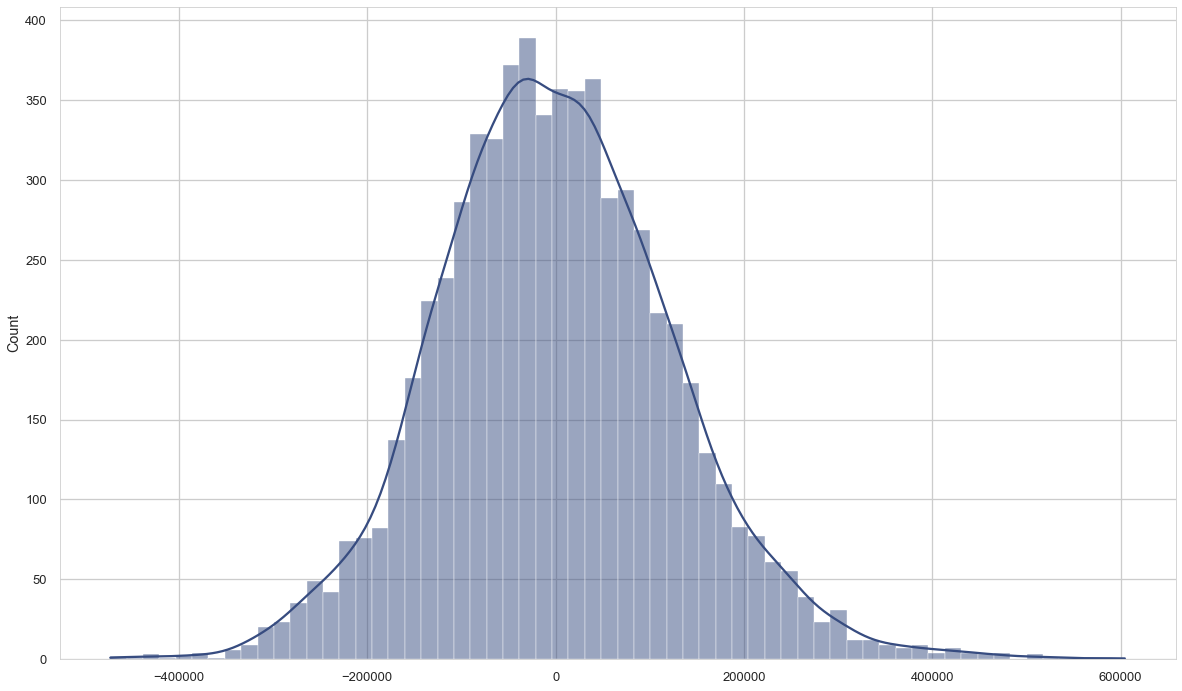

In [1192]:
fig, ax = plt.subplots(figsize = (20,12))

sns.histplot(data=res, kde=True, color=c("indigo"))

In [1153]:
lr.fit(predictors3b, target3b)

LinearRegression()

In [1154]:
y_hat = lr.predict(predictors3b)
y_hat

array([331019.13446313, 375440.86019952, 346272.24981523, ...,
       291660.16929833, 430904.65554162, 289580.5361752 ])

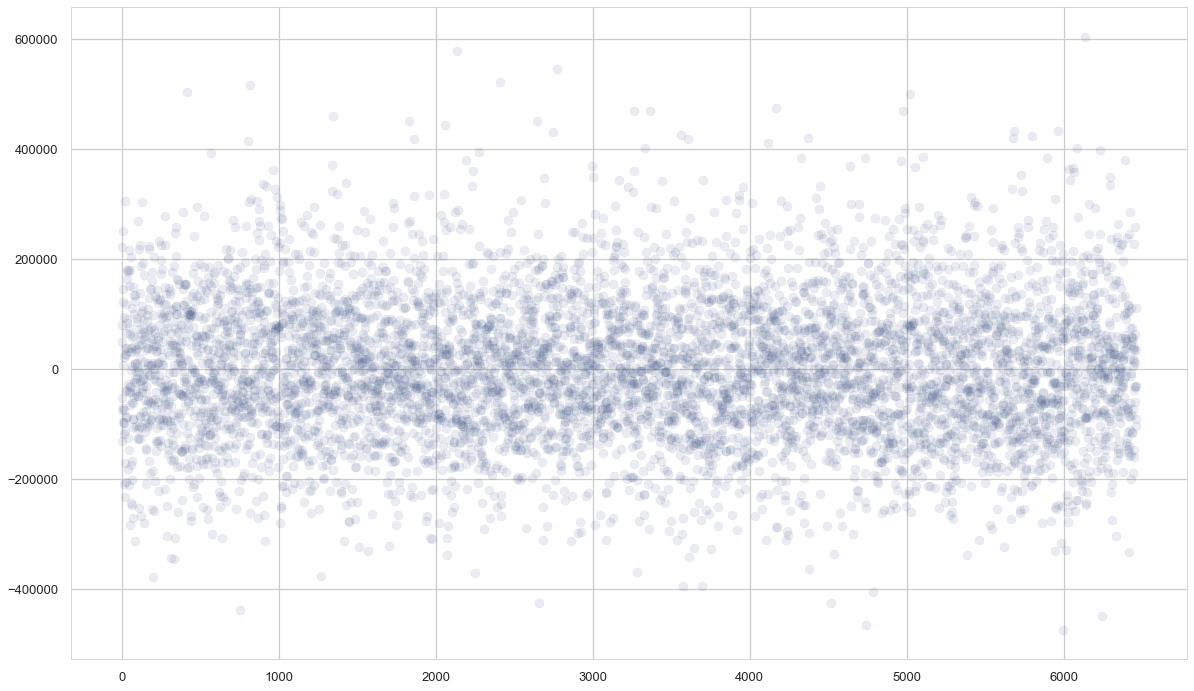

In [1197]:
fig, ax = plt.subplots(figsize = (20,12))

resid = (target3b - y_hat)
plt.scatter(x=range(y_hat.shape[0]), y=resid, alpha=0.1, color=c("indigo"))

Need Markdown here

In [1156]:
# Checking for any colinear features after our most recent updates to the model

final_df_recent.corr()

,price,bedrooms,sqft_living,floors,yr_built,condition_Good,condition_Very Good,grade_cat_Better,grade_cat_Excellent,grade_cat_Good,grade_cat_Low Average,grade_cat_Luxury,grade_cat_Very Good,baths_rnd
price,1.000000,0.297334,0.668111,0.086822,0.070998,-0.015462,-0.001174,0.394959,0.255352,-0.199307,-0.089828,0.062049,0.411959,0.417230
bedrooms,0.297334,1.000000,0.637277,-0.037447,-0.006995,0.006550,0.014370,0.196189,0.096649,-0.136352,-0.076022,0.026159,0.149615,0.521081
sqft_living,0.668111,0.637277,1.000000,-0.071633,-0.028823,0.002981,-0.012644,0.353772,0.249807,-0.253440,-0.088987,0.090462,0.395070,0.596887
floors,0.086822,-0.037447,-0.071633,1.000000,0.245547,-0.101552,-0.019396,0.017245,0.003745,0.139621,-0.094745,-0.012356,-0.015795,0.083979
yr_built,0.070998,-0.006995,-0.028823,0.245547,1.000000,-0.263330,-0.058976,0.073149,-0.073904,0.120742,-0.039967,-0.022328,-0.095009,0.060804
condition_Good,-0.015462,0.006550,0.002981,-0.101552,-0.263330,1.000000,-0.010557,-0.031988,-0.005907,-0.030592,0.028340,0.023412,0.015242,-0.028004
condition_Very Good,-0.001174,0.014370,-0.012644,-0.019396,-0.058976,-0.010557,1.000000,-0.015239,-0.006692,-0.013783,-0.003955,-0.001470,0.005229,0.019060
grade_cat_Better,0.394959,0.196189,0.353772,0.017245,0.073149,-0.031988,-0.015239,1.000000,-0.069798,-0.455551,-0.041252,-0.015337,-0.166597,0.152896
grade_cat_Excellent,0.255352,0.096649,0.249807,0.003745,-0.073904,-0.005907,-0.006692,-0.069798,1.000000,-0.104658,-0.009477,-0.003523,-0.038274,0.152917
grade_cat_Good,-0.199307,-0.136352,-0.253440,0.139621,0.120742,-0.030592,-0.013783,-0.455551,-0.104658,1.000000,-0.061856,-0.022997,-0.249803,-0.069106


In [1157]:
# Create absolute values to understand if any features are above .75 r2

abs(final_df_recent.corr()) > 0.75

,price,bedrooms,sqft_living,floors,yr_built,condition_Good,condition_Very Good,grade_cat_Better,grade_cat_Excellent,grade_cat_Good,grade_cat_Low Average,grade_cat_Luxury,grade_cat_Very Good,baths_rnd
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,True,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition_Good,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition_Very Good,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade_cat_Better,False,False,False,False,False,False,False,True,False,False,False,False,False,False
grade_cat_Excellent,False,False,False,False,False,False,False,False,True,False,False,False,False,False
grade_cat_Good,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [1158]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=final_df_recent.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [1159]:
df[(df.cc >.75) & (df.cc <1)]

,cc
pairs,


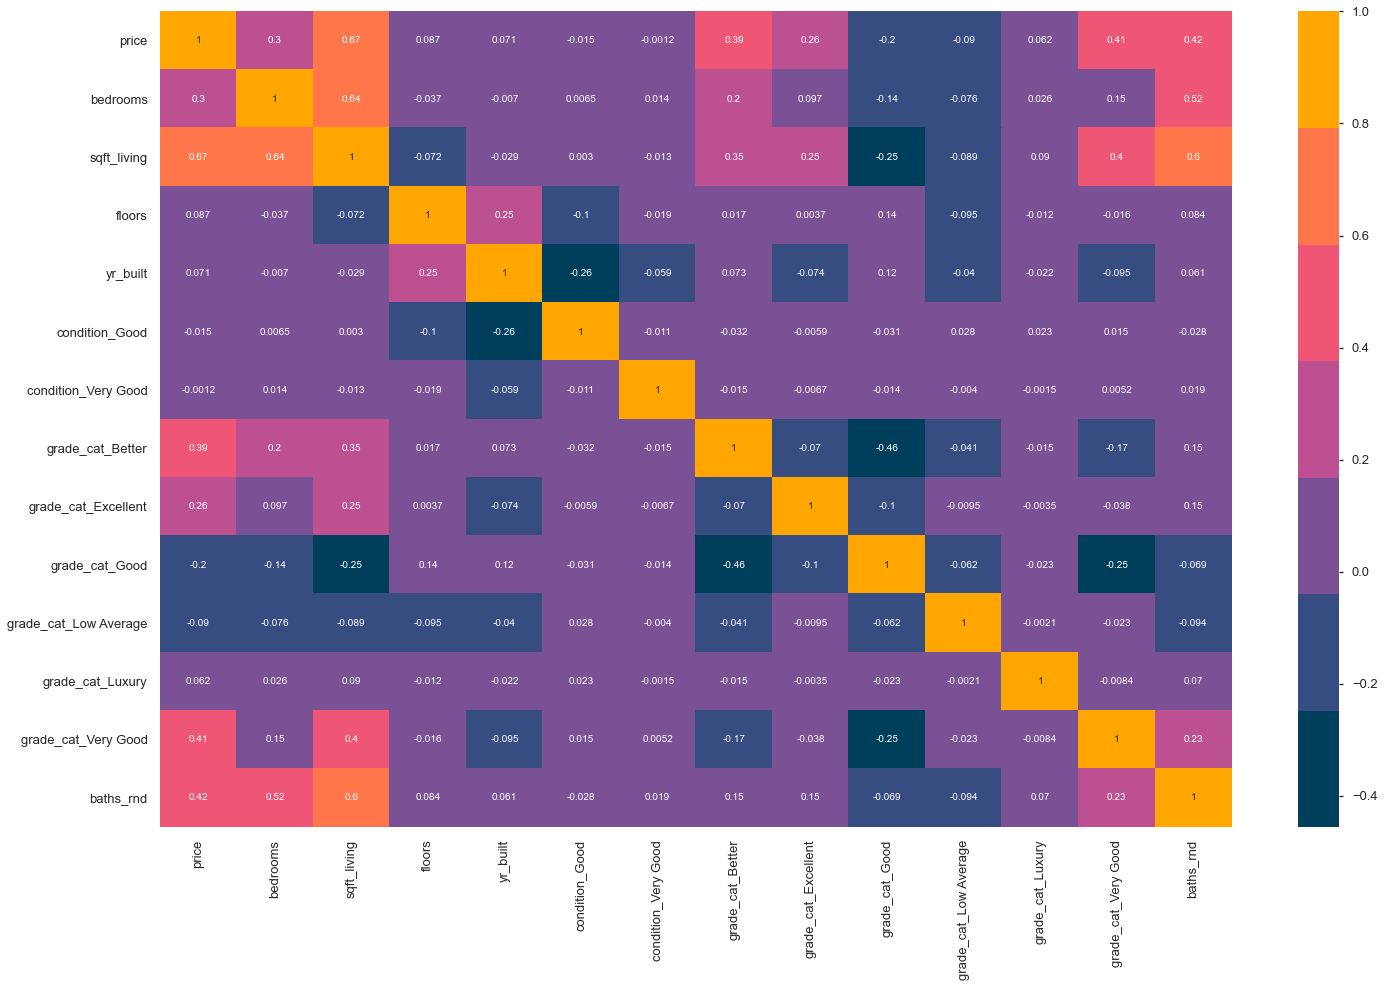

In [1160]:
plt.figure(figsize = (24,15))
corr = final_df_recent.corr()

sns.heatmap(corr, annot=True, cmap=pal)
plt.show()

## Model3c

One last feature log transforming our price dependent variable to try and normalize one last time.

In [1161]:
# log transforming the price column

final_df_recent['price_log'] = np.log(final_df_recent['price'])
final_df_recent = final_df_recent.drop(['price'], axis=1)
final_df_recent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 6 to 21596
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedrooms               6463 non-null   int64  
 1   sqft_living            6463 non-null   int64  
 2   floors                 6463 non-null   float64
 3   yr_built               6463 non-null   int64  
 4   condition_Good         6463 non-null   uint8  
 5   condition_Very Good    6463 non-null   uint8  
 6   grade_cat_Better       6463 non-null   uint8  
 7   grade_cat_Excellent    6463 non-null   uint8  
 8   grade_cat_Good         6463 non-null   uint8  
 9   grade_cat_Low Average  6463 non-null   uint8  
 10  grade_cat_Luxury       6463 non-null   uint8  
 11  grade_cat_Very Good    6463 non-null   uint8  
 12  baths_rnd              6463 non-null   float64
 13  price_log              6463 non-null   float64
dtypes: float64(3), int64(3), uint8(8)
memory usage: 403.9 K

In [1162]:
# model 3b - removed outliers, combined with features with p values > .05

# create target
target3c = final_df_recent['price_log']

# create predictors
predictors3c = final_df_recent.drop(['price_log'], axis=1)

# create model intercept
predictors_int3c = sm.add_constant(predictors3c)

# fit model to data
model3c = sm.OLS(target3c,predictors_int3c).fit()

In [1163]:
model3c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     765.1
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:34:21   Log-Likelihood:                -133.02
No. Observations:                6463   AIC:                             294.0
Df Residuals:                    6449   BIC:                             388.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.8249      0.948      5.092      0.000       2.967       6.682
bedrooms                 -0.0619      0.005    -11.679      0.000      -0.072      -0.052
sqft_living               0.0002   6.93e-06     27.911      0.000       0.000       0.000
floors                    0.0710      0.008      9.368      0.000       0.056       0.086
yr_built                  0.0038      0.000      7.927      0.000       0.003       0.005
condition_Good            0.0375      0.017      2.254      0.024       0.005       0.070
condition_Very Good       0.1397      0.059      2.386      0.017       0.025       0.255
grade_cat_Better          0.4420      0.011     41.665      0.000       0.421       0.463
grade_cat_Excellent       0.6132      0.028     21.889      0.000       0.558       0.668
grade_cat_Good            0.2153      0.008     26.513      0.000       0.199       0.231
grade_cat_Low Average    -0.1641      0.042     -3.916      0.000      -0.246      -0.082
grade_cat_Luxury          0.4627      0.112      4.120      0.000       0.243       0.683
grade_cat_Very Good       0.5466      0.015     35.973      0.000       0.517       0.576
baths_rnd                 0.0367      0.008      4.723      0.000       0.021       0.052
==============================================================================
Omnibus:                       22.386   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.860
Skew:                          -0.106   Prob(JB):                     2.95e-05
Kurtosis:                       2.820   Cond. No.                     9.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Final Predictions & Errors

Going back to our final model 3b to understand mean errors, and any train/ test information.  This is not as important for the analysis that we completed.  However, I am executing here in the event there are questions around capability and model performance.

In [1164]:
# Looking at mean absolute error

metrics.mean_absolute_error(target3b, y_hat)

99009.9720980446

In [1165]:
# Looking at mean squared error

metrics.mean_squared_error(target3b, y_hat, squared=False)

126418.51534930145

In [1166]:
# Creating a test/ train split of 80/20 for both our predictors and dependent features

X_train, X_test, y_train, y_test = train_test_split(predictors3b, target3b, test_size=0.20)
print(len(X_train), len(X_test), len(y_train), len(y_test))

5170 1293 5170 1293


In [1167]:
# Fitting our train/ test splits

lr.fit(X_train, y_train)

# Create price predictions on train and test data from the independant variables
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

In [1168]:
# Create train & test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [1169]:
# Compute MSE for train and test set
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)

print('Train Mean Squared Error: ', mse_train)
print('Test Mean Squared Error: ', mse_test)

Train Mean Squared Error:  15804563761.125544
Test Mean Squared Error:  16734304815.474533


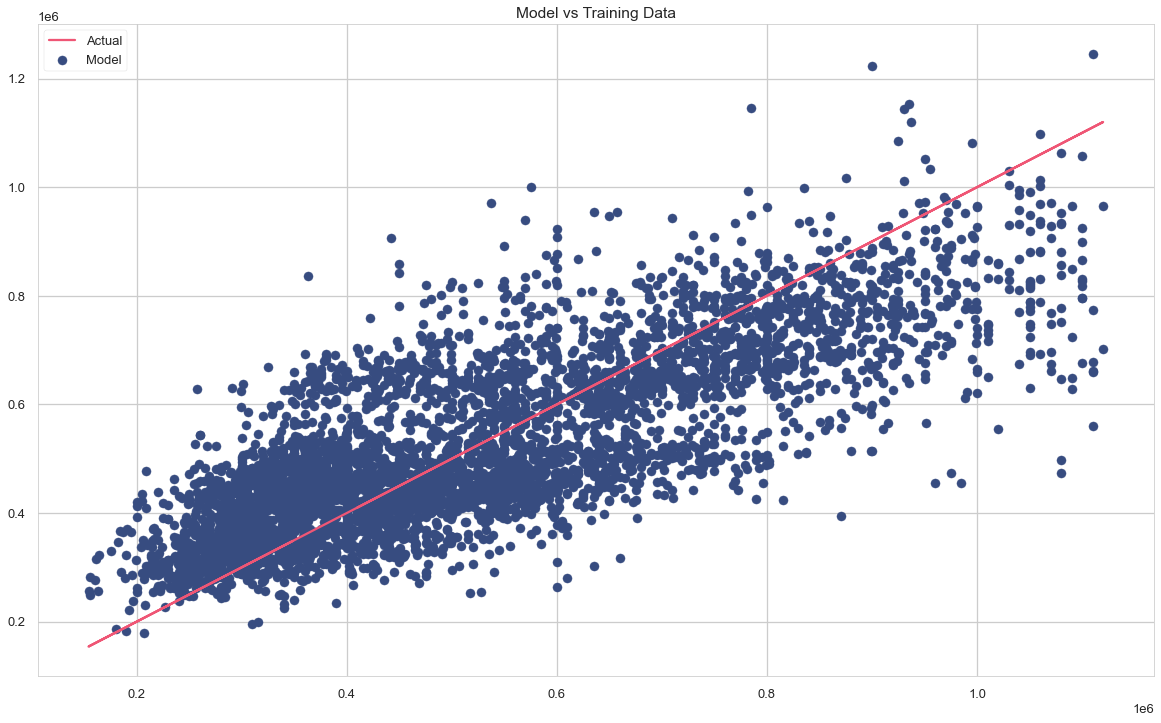

In [1201]:
# Create a matplotlib figure
plt.figure(figsize=(20, 12))
# Create a scatterplot on the figure of y-train
plt.scatter(y_train, y_hat_train, label='Model', color=c("indigo"))
# Plot y_hat_train
plt.plot(y_train, y_train, label='Actual', color=c("peach"))
plt.title('Model vs Training Data')
plt.legend()

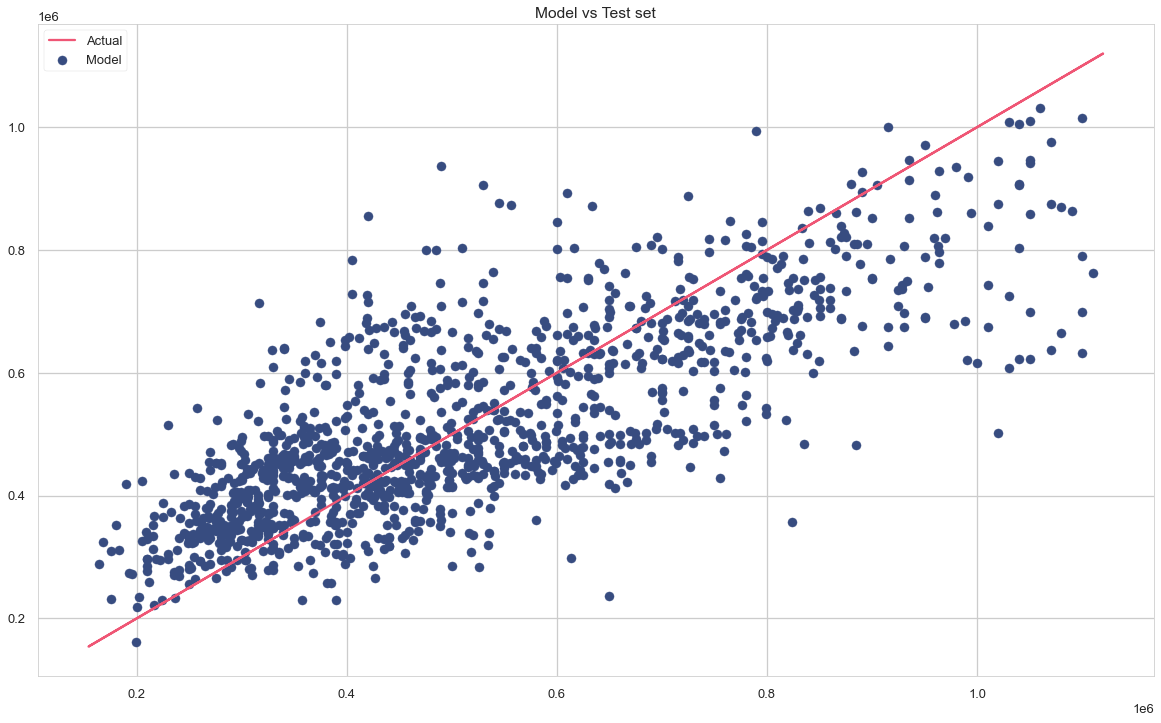

In [1202]:
# Create a matplotlib figure
plt.figure(figsize=(20,12))
# Create a scatter plot
plt.scatter(y_test, y_hat_test, label='Model', color=c("indigo"))
plt.plot(y_train, y_train, label='Actual', color=c("peach"))
plt.title('Model vs Test set')
plt.legend()